In [24]:
# For accurate prediction and due to the timeframe of data available, sets of data between October 2019 and December 2020 have been used.
# The memory size of the PC used for this project has also been taken into consideration and the sets of data available between the desried timeframe have been careful chosen in respect to the workable size of data.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Energy Use Data
ele_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\Energy_use\ele.csv')

# Outdoor Environment
site_weather_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\Outdoor_environmental\site_weather.csv')

# Occupant Data
occ_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\Occupant\occ.csv')

# Indoor Environmental Data
zone_temp_interior_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\Indoor_environmental\zone_temp_interior.csv')
zone_temp_sp_c_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\Indoor_environmental\zone_temp_sp_c.csv')
zone_temp_sp_h_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\Indoor_environmental\zone_temp_sp_h.csv')

# HVAC Operational Data
rtu_sa_t_sp_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\HVAC_operational\rtu_sa_t_sp.csv')
rtu_sa_fr_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\HVAC_operational\rtu_sa_fr.csv')
ashp_hw_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\HVAC_operational\ashp_hw.csv')
ashp_cw_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata\HVAC_operational\ashp_cw.csv')


This section takes a brief look into the structure and the attributes of the each set of data, it gives the accurate description of each sets of data including descriptive characteristics like mean, standard deviation, the minimum and maximum values...

In [25]:
# Energy use dataset

ele_df.head()
ele_df.tail()

ele_df.dtypes

ele_df.describe()

mels_S          lig_S         mels_N         hvac_N  \
count  103010.000000  103014.000000  103024.000000  101506.000000   
mean        2.572930       1.458995       8.746011      21.234184   
std         2.568344       1.861402       6.440186      14.556417   
min        -0.335936      -0.049644      -0.439249       0.000000   
25%         0.600000       0.100000       2.607771       8.454286   
50%         1.833333       0.200000       8.515000      20.329737   
75%         3.000000       3.400000      10.850000      32.124107   
max        14.580000      10.712500      35.976000      84.500000   

              hvac_S    Unnamed: 6  
count  101506.000000  35136.000000  
mean       19.721233     18.964405  
std        12.882716     11.948252  
min         0.000000      0.000000  
25%        10.447582     11.079500  
50%        21.000000     20.260000  
75%        26.680000     24.509605  
max        79.800000     64.811875

In [26]:
# Outdoor environmental dataset

site_weather_df.head()
site_weather_df.tail()

site_weather_df.dtypes

site_weather_df.describe()

air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
count   105217.000000   105217.000000                 105217.000000   
mean        14.241368       13.809009                      6.859702   
std          5.224924        4.781505                      5.199145   
min          1.300000        1.190000                    -20.750000   
25%         10.640000       10.561000                      4.350000   
50%         13.180000       12.867000                      8.110000   
75%         17.100000       16.330000                     10.660000   
max         42.333000       46.110000                     18.920000   

       relative_humidity_set_1  solar_radiation_set_1  
count            105217.000000          105217.000000  
mean                 66.099212             189.608951  
std                  21.633467             275.328093  
min                   5.490000               0.000000  
25%                  51.170000               0.020000  
50%                  70.140000               5.010000  
75%                  85.000000             342.500000  
max                  95.500000            1101.000000

In [27]:
# Occupant dataset
occ_df.head()
occ_df.tail()

occ_df.dtypes

occ_df.describe()

occ_third_south  occ_fourth_south
count    396193.000000     396193.000000
mean          6.585828          4.850228
std          11.029108          8.305851
min           0.000000          0.000000
25%           0.000000          0.000000
50%           1.000000          1.000000
75%           8.000000          5.000000
max          74.000000         60.000000

Indoor Environmental Datasets

In [28]:
zone_temp_interior_df.head()
zone_temp_interior_df.tail()

zone_temp_interior_df.dtypes

zone_temp_interior_df.describe()

cerc_templogger_1  cerc_templogger_10  cerc_templogger_11  \
count      145766.000000       142084.000000        149315.00000   
mean           23.242548           24.185107            23.75224   
std             1.433877            0.970890             1.15933   
min             0.000000            0.000000            19.12500   
25%            22.625000           23.687000            22.87500   
50%            23.312000           24.250000            23.75000   
75%            23.812000           24.812000            24.62500   
max            85.000000           27.812000            28.81200   

       cerc_templogger_12  cerc_templogger_13  cerc_templogger_14  \
count       137443.000000       148697.000000       147719.000000   
mean            22.958734           23.495835           23.538829   
std              1.137035            0.970799            0.945101   
min             18.312000            0.000000           18.562000   
25%             22.312000           22.937000           23.187000   
50%             23.000000           23.687000           23.687000   
75%             23.625000           24.125000           24.125000   
max             31.250000           27.000000           27.250000   

       cerc_templogger_15  cerc_templogger_16  cerc_templogger_2  \
count       124454.000000       143261.000000      149315.000000   
mean            23.022989           23.254222          22.456330   
std              6.356596            1.029439           0.900188   
min              0.000000           17.937000          17.687000   
25%             22.937000           22.875000          21.937000   
50%             23.687000           23.375000          22.437000   
75%             24.500000           23.875000          22.937000   
max             85.000000           85.000000          26.529127   

       cerc_templogger_3  cerc_templogger_4  cerc_templogger_5  \
count      148028.000000      149315.000000      149315.000000   
mean           24.304992          23.364441          23.205540   
std             1.123397           0.764061           1.122081   
min             0.000000          19.937000          19.312000   
25%            23.625000          22.875000          22.437000   
50%            24.312000          23.312000          23.000000   
75%            25.062000          23.750000          24.062000   
max            85.000000          26.875000          85.000000   

       cerc_templogger_6  cerc_templogger_7  cerc_templogger_8  \
count      149313.000000      149315.000000      149316.000000   
mean           23.732271          23.155557          22.818319   
std             1.055469           1.261485           0.878822   
min            18.562000          17.937000          18.062000   
25%            23.062000          22.437000          22.500000   
50%            23.937000          23.062000          22.937000   
75%            24.500000          24.125000          23.375000   
max            52.875000          27.062000          25.500000   

       cerc_templogger_9  
count      149313.000000  
mean           23.837043  
std             1.020951  
min            18.875000  
25%            23.187000  
50%            23.875000  
75%            24.500000  
max            27.625000

In [29]:
zone_temp_sp_c_df.head()
zone_temp_sp_c_df.tail()

zone_temp_sp_c_df.dtypes

zone_temp_sp_c_df.describe()

zone_016_cooling_sp  zone_017_cooling_sp  zone_018_cooling_sp  \
count        236632.000000        236634.000000        236634.000000   
mean             75.121427            75.120621            75.398163   
std               3.903295             3.902805             3.925385   
min              73.000000            73.000000            73.000000   
25%              73.000000            73.000000            73.000000   
50%              74.000000            74.000000            74.000000   
75%              74.000000            74.000000            75.000000   
max              85.000000            85.000000            86.000000   

       zone_019_cooling_sp  zone_021_cooling_sp  zone_023_cooling_sp  \
count        235917.000000        236710.000000        236329.000000   
mean             77.923396            75.426512            75.226066   
std               0.268351             4.198266            17.834592   
min              77.000000            72.000000            56.120381   
25%              78.000000            73.000000            73.000000   
50%              78.000000            74.000000            73.000000   
75%              78.000000            75.000000            74.000000   
max              79.246677            86.000000          6091.472000   

       zone_024_cooling_sp  zone_025_cooling_sp  zone_026_cooling_sp  \
count        236263.000000        236260.000000        236665.000000   
mean             74.827297            75.112964            74.737782   
std               3.843093             4.203411             4.255548   
min              72.108549            72.000000            71.443150   
25%              73.000000            73.000000            73.000000   
50%              73.000000            74.000000            73.000000   
75%              74.000000            74.000000            74.000000   
max              86.000000            86.000000            86.000000   

       zone_027_cooling_sp  ...    Unnamed: 42  Unnamed: 43    Unnamed: 44  \
count        236162.000000  ...  105408.000000  105408.0000  105408.000000   
mean             73.744178  ...      75.322767      73.8287      74.590329   
std               4.356580  ...       2.561712       2.4443       2.462501   
min              71.000000  ...      74.000000      73.0000      73.577927   
25%              71.000000  ...      74.000000      73.0000      74.000000   
50%              73.000000  ...      75.000000      73.0000      74.000000   
75%              74.000000  ...      75.000000      74.0000      74.000000   
max              85.000000  ...      86.000000      84.0000      85.000000   

         Unnamed: 45    Unnamed: 46    Unnamed: 47    Unnamed: 48  \
count  105408.000000  105408.000000  105408.000000  105408.000000   
mean       74.590349      74.590304      90.798171      74.590373   
std         2.462579       2.462512     241.141960       2.462567   
min        73.526632      73.430083     -58.930313      73.583058   
25%        74.000000      74.000000      72.000000      74.000000   
50%        74.000000      74.000000      72.000000      74.000000   
75%        74.000000      74.000000      72.000000      74.000000   
max        85.000000      85.000000   28765.030000      85.000000   

         Unnamed: 49    Unnamed: 50    Unnamed: 51  
count  105408.000000  105408.000000  105408.000000  
mean       73.057489      71.979602      75.269368  
std         2.842387       2.881364      22.888219  
min        71.500000      70.770822      52.587221  
25%        72.500000      71.000000      74.000000  
50%        72.500000      71.000000      74.000000  
75%        72.500000      72.000000      74.000000  
max        85.000000      84.000000    4586.805700  

[8 rows x 51 columns]

In [30]:
zone_temp_sp_h_df.head()
zone_temp_sp_h_df.tail()

zone_temp_sp_h_df.dtypes

zone_temp_sp_h_df.describe()

zone_016_heating_sp  zone_017_heating_sp  zone_018_heating_sp  \
count        236626.000000        236626.000000        236626.000000   
mean             69.023572            69.023798            69.301164   
std               3.806144             3.805318             3.846478   
min              59.000000            59.000000            59.000000   
25%              70.000000            70.000000            70.000000   
50%              70.000000            70.000000            71.000000   
75%              71.000000            71.000000            71.000000   
max              75.000000            73.762850            73.120860   

       zone_019_heating_sp  zone_021_heating_sp  zone_023_heating_sp  \
count        235911.000000        236704.000000        236325.000000   
mean             63.922265            69.330354            69.006095   
std               0.267900             3.596277            18.112955   
min              62.798871            59.000000            20.188187   
25%              64.000000            70.000000            70.000000   
50%              64.000000            71.000000            70.000000   
75%              64.000000            71.000000            71.000000   
max              64.469574            72.762850          6088.472000   

       zone_024_heating_sp  zone_025_heating_sp  zone_026_heating_sp  \
count        236256.000000        236253.000000        236658.000000   
mean             68.717724            69.012192            68.641815   
std               3.853212             3.511598             3.469710   
min              58.878520            60.000000            59.000000   
25%              70.000000            70.000000            70.000000   
50%              70.000000            70.000000            70.000000   
75%              70.000000            71.000000            70.000000   
max              73.762850            73.762850            71.120860   

       zone_027_heating_sp  ...    Unnamed: 42    Unnamed: 43    Unnamed: 44  \
count        236155.000000  ...  105408.000000  105408.000000  105408.000000   
mean             68.627676  ...      71.151238      69.657028      70.418772   
std               3.849581  ...       2.438942       2.557015       2.464411   
min              59.000000  ...      61.000000      59.000000      60.000000   
25%              70.000000  ...      71.000000      70.000000      71.000000   
50%              70.000000  ...      72.000000      70.000000      71.000000   
75%              70.000000  ...      72.000000      70.000000      71.000000   
max              73.120860  ...      72.977220      74.000000      74.000000   

         Unnamed: 45    Unnamed: 46    Unnamed: 47    Unnamed: 48  \
count  105408.000000  105408.000000  105408.000000  105408.000000   
mean       70.418825      70.418800      80.665640      70.418883   
std         2.464317       2.464379     240.973961       2.464208   
min        60.000000      60.000000    -255.762398      60.000000   
25%        71.000000      71.000000      69.000000      71.000000   
50%        71.000000      71.000000      69.000000      71.000000   
75%        71.000000      71.000000      69.000000      71.000000   
max        74.000000      74.000000   28762.030000      74.000000   

         Unnamed: 49    Unnamed: 50    Unnamed: 51  
count  105408.000000  105408.000000  105408.000000  
mean       70.306045      69.701501      69.836472  
std         2.458193       2.574009      23.497738  
min        60.000000      59.000000      38.188854  
25%        71.000000      70.000000      71.000000  
50%        71.000000      70.000000      71.000000  
75%        71.000000      71.000000      71.000000  
max        74.000000      72.977220    4583.805700  

[8 rows x 51 columns]

In [32]:
ashp_cw_df.head()
ashp_cw_df.tail()

ashp_cw_df.dtypes

ashp_cw_df.describe()

aru_001_cwr_temp  aru_001_cws_fr_gpm  aru_001_cws_temp
count      43979.000000        43979.000000      43979.000000
mean          59.865267           79.741280         61.664644
std            6.238184           16.854011          4.762831
min           38.180000           37.550000         47.270000
25%           54.740000           63.540000         57.800000
50%           60.790000           82.148558         62.560000
75%           65.360000           95.080000         65.830000
max           75.560000          138.610000         75.620000

In [ ]:
# Fixing the time format and filling in the missing values in the dataset using linear interpolation, matrix factorisation and KNNImputer
import csv
import numpy as np
import pandas as pd
from pandas import Series
import datetime
import time
import os
from fancyimpute import KNN, MatrixFactorization
import math
from sklearn.impute import KNNImputer

path = r"C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_cleandata"
files = os.listdir(path)
path_postprocess = r"C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess"

for filename in files:
    row = pd.read_csv(path+'\\'+filename)
    row['date'] = pd.to_datetime(row['date'], infer_datetime_format=True) 
    helper=pd.DataFrame({'date': pd.date_range(row['date'].min(), row['date'].max(), freq='15min')})
    row = pd.merge(row, helper, on='date', how='outer').sort_values('date')
    count_out = Series([0],index=['date']) 
    count_gap = Series([0],index=['date']) 
    count_outgap = Series([0],index=['date']) 
    gap_max=Series([0],index=['date']) 

    for i in range(1, len(row.columns)):
        k = 0
        out_gapcount=0
        start_index = {}
        starttime = {}
        end_index = {}
        endtime = {}
        gap = {}
        if pd.isnull(row.iloc[len(row.index)-1,i]) == True or math.isnan(row.iloc[len(row.index)-1,i])==True:
            row.iloc[len(row.index)-1,i]=0
        for j in range(0, len(row.index)):
            if (pd.isnull(row.iloc[j,i]) or math.isnan(row.iloc[j,i]))and pd.isnull(row.iloc[j-1,i]) == False:
                starttime[k]=row.iloc[j-1,0] 
                start_index[k]=j-1
            elif (pd.isnull(row.iloc[j-1,i]) or math.isnan(row.iloc[j-1,i])) and pd.isnull(row.iloc[j,i]) == False:
                endtime[k]=row.iloc[j,0] 
                end_index[k]=j
                k=k+1
        if k != 0:
            for m in range(k):
                starttime_struct=datetime.datetime.strptime(str(starttime[m]), '%Y-%m-%d %H:%M:%S')
                endtime_struct = datetime.datetime.strptime(str(endtime[m]), '%Y-%m-%d %H:%M:%S')
                gap[m]=(endtime_struct-starttime_struct).total_seconds()
                if  gap[m]<= 3600: 
                    if len(row.iloc[start_index[m]:end_index[m]+1, i]) > 0:
                        row.iloc[start_index[m]:end_index[m]+1, i] = row.iloc[start_index[m]:end_index[m]+1, i].interpolate(method='linear')
                elif gap[m] >3600*24:
                    out_gapcount=out_gapcount+1
            maxgap = max(gap.values())/60
            gap_max = pd.concat([gap_max, pd.Series(maxgap, index=[row.columns[i]])])
        outcount=np.sum(row.iloc[:, i]<0)/len(row)
        count_out = pd.concat([count_out, pd.Series(outcount, index=[row.columns[i]])])
        count_gap = pd.concat([count_gap, pd.Series(k, index=[row.columns[i]])])
        count_outgap = pd.concat([count_outgap, pd.Series(out_gapcount, index=[row.columns[i]])])
        row_interpolation=np.array(row.iloc[:,1:], dtype=np.float64)
    imputer = KNNImputer(n_neighbors=3)
    row_interpolation = imputer.fit_transform(row_interpolation) 
    for i in range(1, len(row.columns)):
        k=0
        start_index = {}
        starttime = {}
        end_index = {}
        endtime = {}
        for j in range(0, len(row.index)):
            if pd.isnull(row.iloc[j,i]) and pd.isnull(row.iloc[j-1,i]) == False:
                starttime[k]=row.iloc[j-1,0]
                start_index[k]=j-1
            elif pd.isnull(row.iloc[j-1,i]) and pd.isnull(row.iloc[j,i]) == False:
                endtime[k]=row.iloc[j,0]
                end_index[k]=j
                k=k+1
        for m in range(k):
            starttime_struct=datetime.datetime.strptime(str(starttime[m]), '%Y-%m-%d %H:%M:%S')
            endtime_struct = datetime.datetime.strptime(str(endtime[m]), '%Y-%m-%d %H:%M:%S')
            gap[m]=(endtime_struct-starttime_struct).total_seconds()
            if  gap[m]>= 3600*24:
                row_interpolation[start_index[m]:end_index[m]+1,i-1]=None
    if out_gapcount !=0:
        row_interpolation= MatrixFactorization().fit_transform(row_interpolation) #Apply MF algorithm if the gap is larger than one day         
    row.iloc[:,1:]=row_interpolation
    cols_not_null = (len(row)-row.count(axis=0))/len(row)
    data=pd.DataFrame({'missingrate':cols_not_null,'outrate':count_out,'count_outgap':count_outgap,'count_gap':count_gap,'maxgap':gap_max})
    data.to_csv(path_postprocess+'\\'+'parameter_'+filename, sep=',', header=True, index=True)
    row.to_csv(path_postprocess+'\\'+'data_'+filename, sep=',', header=True, index=False)

In [41]:
# Replacing the processed data with the original data

# Energy Use Data
ele_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Energy_use_data\data_ele.csv')

# Outdoor Environment
site_weather_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Outdoor_environmental_data\data_site_weather.csv')

# Occupant Data
occ_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Occupant_data\data_occ.csv')

# Indoor Environmental Data
zone_temp_interior_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Indoor_environmental_data\data_zone_temp_interior.csv')
data_zone_temp_sp_c_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Indoor_environmental_data\data_zone_temp_sp_c.csv')
data_zone_temp_sp_h_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Indoor_environmental_data\data_zone_temp_sp_h.csv')

# HVAC Operational Data
rtu_sa_t_sp_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\HVAC_operational_data\data_rtu_sa_t_sp.csv')
rtu_sa_fr_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\HVAC_operational_data\data_rtu_sa_fr.csv')
ashp_hw_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\HVAC_operational_data\data_ashp_hw.csv')
ashp_cw_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\HVAC_operational_data\data_ashp_cw.csv')

In [42]:
# Merging the important csv files together. We will start by merging the first two files together and repeat the process untill all files are merged

merged_df = pd.merge(ele_df, site_weather_df, on='date', how='inner')

merged_df.to_csv('merged_data.csv', index=False)

print("Merged DataFrame saved to merged_data.csv")


Merged DataFrame saved to merged_data.csv


In [43]:
merged_data_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data.csv')
merged_data_df.head(1000)

date  mels_S     lig_S    mels_N     hvac_N     hvac_S  \
0    2018-01-01 01:00:00    1.20  0.200000  7.500000  37.400002  19.500000   
1    2018-01-01 01:15:00    1.30  0.200000  6.800000  37.500000  19.889999   
2    2018-01-01 01:30:00    1.10  0.200000  7.400000  38.000000  19.299999   
3    2018-01-01 01:45:00    1.20  0.200000  7.700000  37.200001  18.889999   
4    2018-01-01 02:00:00    1.10  0.200000  7.300000  37.400002  24.700001   
..                   ...     ...       ...       ...        ...        ...   
995  2018-01-11 09:45:00    1.35  0.500000  7.402703  36.400000  23.700000   
996  2018-01-11 10:00:00    1.40  0.557143  8.045946  37.200000  18.390000   
997  2018-01-11 10:15:00    1.45  0.614286  8.689189  37.600000  18.700000   
998  2018-01-11 10:30:00    1.50  0.671429  9.332433  35.900000  18.100000   
999  2018-01-11 10:45:00    1.55  0.728571  9.975676  36.700000  18.200000   

     Unnamed: 6  air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0      7.445567           11.12           11.15                          8.04   
1      7.445567           10.94           11.01                          7.99   
2      7.445567           10.79           10.84                          7.93   
3      7.445567           10.71           10.73                          8.02   
4     11.043297           10.79           10.84                          8.01   
..          ...             ...             ...                           ...   
995    8.738918           10.36           10.50                          9.57   
996    7.445567           10.51           10.64                          9.72   
997    7.445567           10.49           10.55                          9.68   
998    4.693111           10.52           10.52                          9.71   
999    4.693111           10.40           10.51                          9.58   

     relative_humidity_set_1  solar_radiation_set_1  
0                       81.5                   6.45  
1                       82.2                   1.81  
2                       82.7                   0.24  
3                       83.6                   0.00  
4                       83.1                   0.00  
..                       ...                    ...  
995                     94.9                   0.20  
996                     94.9                   0.20  
997                     94.8                   0.20  
998                     94.8                   0.19  
999                     94.7                   0.20  

[1000 rows x 12 columns]

In [44]:
merged_data1_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data1.csv')
merged_data1_df.head(1000)

date    mels_S     lig_S     mels_N     hvac_N     hvac_S  \
0    2018-02-22 00:30:00  3.642373  1.887719  14.955555  47.816667  18.033333   
1    2018-02-22 00:45:00  3.583051  1.822807  14.707407  47.523889  18.077778   
2    2018-02-22 01:00:00  3.523729  1.757895  14.459259  47.231111  18.122222   
3    2018-02-22 01:15:00  3.464407  1.692982  14.211111  46.938333  18.166667   
4    2018-02-22 01:30:00  3.405085  1.628070  13.962963  46.645556  18.211111   
..                   ...       ...       ...        ...        ...        ...   
995  2018-03-04 09:15:00  1.700000  0.200000   8.690000  39.100000  23.100000   
996  2018-03-04 09:30:00  1.800000  0.200000   8.400000  38.900000  22.700000   
997  2018-03-04 09:45:00  1.800000  0.200000   8.400000  39.600000  18.000000   
998  2018-03-04 10:00:00  1.800000  0.200000   8.400000  39.290000  18.390000   
999  2018-03-04 10:15:00  1.700000  0.200000   8.500000  39.290000  17.300000   

     Unnamed: 6  air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0      7.829963           10.43           10.07                         -5.98   
1      7.829963           10.05            9.73                         -5.30   
2      7.829963            9.76            9.51                         -4.26   
3      7.829963            9.33            9.13                         -3.76   
4      7.829963            8.99            8.82                         -2.81   
..          ...             ...             ...                           ...   
995    9.008085            4.56            4.70                          1.90   
996    9.008085            4.63            4.82                          1.78   
997    4.693111            4.86            5.09                          1.55   
998    7.445567            4.95            5.06                          1.43   
999    4.693111            4.79            4.91                          1.37   

     ...  cerc_templogger_15  cerc_templogger_16  cerc_templogger_2  \
0    ...              23.500             22.0620            23.3750   
1    ...              23.531             21.9370            23.1250   
2    ...              23.125             21.7500            23.3750   
3    ...              23.156             21.8435            23.8125   
4    ...              23.562             22.0000            23.1870   
..   ...                 ...                 ...                ...   
995  ...              21.281             20.8745            21.4060   
996  ...              21.312             21.1250            21.4370   
997  ...              21.281             20.9060            21.3435   
998  ...              21.187             20.8750            21.3750   
999  ...              21.187             20.6250            21.3120   

     cerc_templogger_3  cerc_templogger_4  cerc_templogger_5  \
0              24.0620            23.5000            23.1250   
1              24.1250            23.5310            22.9375   
2              24.1870            23.5000            23.0620   
3              24.1245            23.5000            23.0935   
4              24.1870            23.5000            23.0000   
..                 ...                ...                ...   
995            22.6870            22.8435            21.7500   
996            22.7500            22.8120            21.7500   
997            22.6870            22.8120            21.6250   
998            22.6870            22.6870            21.6250   
999            22.6250            22.7185            21.6250   

     cerc_templogger_6  cerc_templogger_7  cerc_templogger_8  \
0              23.5620            22.3120            22.3750   
1              23.6875            22.4375            22.5000   
2              24.0000            22.4370            22.3750   
3              24.1245            22.4060            22.5935   
4              23.9370            22.4370            22.4370   
..                 ...                ...                ...   
995 

In [21]:
# Merging the important csv files together. We will continue by merging the previously merged file with the next one

merged_df = pd.merge(merged_data1_df, rtu_sa_t_sp_df, on='date', how='inner')

merged_df.to_csv('merged_data2.csv', index=False)

print("Merged DataFrame saved to merged_data2.csv")

Merged DataFrame saved to merged_data2.csv


In [22]:
merged_data2_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data2.csv')
merged_data2_df.head(1000)

date    mels_S     lig_S     mels_N     hvac_N     hvac_S  \
0    2018-02-22 00:30:00  3.642373  1.887719  14.955555  47.816667  18.033333   
1    2018-02-22 00:45:00  3.583051  1.822807  14.707407  47.523889  18.077778   
2    2018-02-22 01:00:00  3.523729  1.757895  14.459259  47.231111  18.122222   
3    2018-02-22 01:15:00  3.464407  1.692982  14.211111  46.938333  18.166667   
4    2018-02-22 01:30:00  3.405085  1.628070  13.962963  46.645556  18.211111   
..                   ...       ...       ...        ...        ...        ...   
995  2018-03-04 09:15:00  1.700000  0.200000   8.690000  39.100000  23.100000   
996  2018-03-04 09:30:00  1.800000  0.200000   8.400000  38.900000  22.700000   
997  2018-03-04 09:45:00  1.800000  0.200000   8.400000  39.600000  18.000000   
998  2018-03-04 10:00:00  1.800000  0.200000   8.400000  39.290000  18.390000   
999  2018-03-04 10:15:00  1.700000  0.200000   8.500000  39.290000  17.300000   

     Unnamed: 6  air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0      7.829963           10.43           10.07                         -5.98   
1      7.829963           10.05            9.73                         -5.30   
2      7.829963            9.76            9.51                         -4.26   
3      7.829963            9.33            9.13                         -3.76   
4      7.829963            8.99            8.82                         -2.81   
..          ...             ...             ...                           ...   
995    9.008085            4.56            4.70                          1.90   
996    9.008085            4.63            4.82                          1.78   
997    4.693111            4.86            5.09                          1.55   
998    7.445567            4.95            5.06                          1.43   
999    4.693111            4.79            4.91                          1.37   

     ...  cerc_templogger_4  cerc_templogger_5  cerc_templogger_6  \
0    ...            23.5000            23.1250            23.5620   
1    ...            23.5310            22.9375            23.6875   
2    ...            23.5000            23.0620            24.0000   
3    ...            23.5000            23.0935            24.1245   
4    ...            23.5000            23.0000            23.9370   
..   ...                ...                ...                ...   
995  ...            22.8435            21.7500            22.2500   
996  ...            22.8120            21.7500            22.2500   
997  ...            22.8120            21.6250            22.1870   
998  ...            22.6870            21.6250            22.0620   
999  ...            22.7185            21.6250            22.1560   

     cerc_templogger_7  cerc_templogger_8  cerc_templogger_9  \
0              22.3120            22.3750            22.6250   
1              22.4375            22.5000            22.6870   
2              22.4370            22.3750            22.8750   
3              22.4060            22.5935            22.8435   
4              22.4370            22.4370            22.8750   
..                 ...                ...                ...   
995            20.4685            20.8435            21.4060   
996            20.4370            20.8120            21.5000   
997            20.3750            20.8435            21.4060   
998            20.3750            20.9370            21.3750   
999            20.3120            20.6560            21.3745   

     rtu_001_sat_sp_tn  rtu_002_sat_sp_tn  rtu_003_sat_sp_tn  \
0                 68.0               68.0               64.0   
1                 68.0               68.0               64.0   
2                 68.0               68.0               64.0   
3                 68.0               68.0               64.0   
4                 68.0               68.0               64.0   
..                 ...                ...                ...   
995               68.0      

In [23]:
# Merging the important csv files together. We will continue by merging the previously merged file with the next one

merged_df = pd.merge(merged_data2_df, rtu_sa_fr_df, on='date', how='inner')

merged_df.to_csv('merged_data3.csv', index=False)

print("Merged DataFrame saved to merged_data3.csv")

Merged DataFrame saved to merged_data3.csv


In [24]:
merged_data3_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data3.csv')
merged_data3_df.head(1000)

date    mels_S     lig_S     mels_N     hvac_N     hvac_S  \
0    2018-02-22 00:30:00  3.642373  1.887719  14.955555  47.816667  18.033333   
1    2018-02-22 00:45:00  3.583051  1.822807  14.707407  47.523889  18.077778   
2    2018-02-22 01:00:00  3.523729  1.757895  14.459259  47.231111  18.122222   
3    2018-02-22 01:15:00  3.464407  1.692982  14.211111  46.938333  18.166667   
4    2018-02-22 01:30:00  3.405085  1.628070  13.962963  46.645556  18.211111   
..                   ...       ...       ...        ...        ...        ...   
995  2018-03-04 09:15:00  1.700000  0.200000   8.690000  39.100000  23.100000   
996  2018-03-04 09:30:00  1.800000  0.200000   8.400000  38.900000  22.700000   
997  2018-03-04 09:45:00  1.800000  0.200000   8.400000  39.600000  18.000000   
998  2018-03-04 10:00:00  1.800000  0.200000   8.400000  39.290000  18.390000   
999  2018-03-04 10:15:00  1.700000  0.200000   8.500000  39.290000  17.300000   

     Unnamed: 6  air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0      7.829963           10.43           10.07                         -5.98   
1      7.829963           10.05            9.73                         -5.30   
2      7.829963            9.76            9.51                         -4.26   
3      7.829963            9.33            9.13                         -3.76   
4      7.829963            8.99            8.82                         -2.81   
..          ...             ...             ...                           ...   
995    9.008085            4.56            4.70                          1.90   
996    9.008085            4.63            4.82                          1.78   
997    4.693111            4.86            5.09                          1.55   
998    7.445567            4.95            5.06                          1.43   
999    4.693111            4.79            4.91                          1.37   

     ...  cerc_templogger_8  cerc_templogger_9  rtu_001_sat_sp_tn  \
0    ...            22.3750            22.6250               68.0   
1    ...            22.5000            22.6870               68.0   
2    ...            22.3750            22.8750               68.0   
3    ...            22.5935            22.8435               68.0   
4    ...            22.4370            22.8750               68.0   
..   ...                ...                ...                ...   
995  ...            20.8435            21.4060               68.0   
996  ...            20.8120            21.5000               68.0   
997  ...            20.8435            21.4060               68.0   
998  ...            20.9370            21.3750               68.0   
999  ...            20.6560            21.3745               68.0   

     rtu_002_sat_sp_tn  rtu_003_sat_sp_tn  rtu_004_sat_sp_tn  \
0                 68.0               64.0               68.0   
1                 68.0               64.0               68.0   
2                 68.0               64.0               68.0   
3                 68.0               64.0               68.0   
4                 68.0               64.0               68.0   
..                 ...                ...                ...   
995               68.0               64.0               68.0   
996               68.0               64.0               68.0   
997               68.0               64.0               68.0   
998               68.0               64.0               68.0   
999               68.0               64.0               68.0   

     rtu_001_fltrd_sa_flow_tn  rtu_002_fltrd_sa_flow_tn  \
0                   13209.934                 12558.079   
1                   12520.867                 12219.116   
2                   14393.166                 14262.907   
3                   14262.907                 14032.048   
4                   14065.259                 13661.388   
..                        ...                       ...   
995                 14065.259                 14098.395   
996 

In [25]:
# Merging the important csv files together. We will continue by merging the previously merged file with the next one

merged_df = pd.merge(merged_data3_df, ashp_hw_df, on='date', how='inner')

merged_df.to_csv('merged_data4.csv', index=False)

print("Merged DataFrame saved to merged_data4.csv")

Merged DataFrame saved to merged_data4.csv


In [26]:
merged_data4_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data4.csv')
merged_data4_df.head(1000)

date    mels_S     lig_S     mels_N     hvac_N     hvac_S  \
0    2019-10-26 18:15:00  0.712500  0.866667   9.793333  26.071429  19.586250   
1    2019-10-26 18:30:00  0.825000  1.341111  10.362222  27.554545  15.100000   
2    2019-10-26 18:45:00  0.840000  1.815556  10.931111  31.506923  23.811250   
3    2019-10-26 19:00:00  0.883333  2.290000  11.500000  25.784615  21.279333   
4    2019-10-26 19:15:00  0.800000  2.245000   9.550000  28.419333  24.093750   
..                   ...       ...       ...        ...        ...        ...   
995  2019-11-06 03:00:00  2.166667  4.500000  13.900000   0.000000   1.229412   
996  2019-11-06 03:15:00  2.155556  4.433333  13.552667   2.676923   4.953636   
997  2019-11-06 03:30:00  2.144444  4.366667  13.205333   2.699231   0.000000   
998  2019-11-06 03:45:00  2.133333  4.300000  12.858000   3.022941   0.000000   
999  2019-11-06 04:00:00  2.122222  4.233333  12.510667   0.000000   0.000000   

     Unnamed: 6  air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0      7.436248           22.82           20.55                          5.76   
1     10.298287           23.07           20.81                          7.43   
2     15.331961           22.97           20.42                          8.96   
3      7.436248           23.06           20.53                          9.00   
4     16.951610           23.81           21.45                          8.65   
..          ...             ...             ...                           ...   
995    6.261778           18.46           19.82                          1.44   
996    7.003704           18.21           19.61                          1.73   
997    7.293259           18.02           19.66                          1.71   
998    7.293259           17.87           19.72                          1.55   
999    6.261778           17.91           19.57                          1.26   

     ...  rtu_002_sat_sp_tn  rtu_003_sat_sp_tn  rtu_004_sat_sp_tn  \
0    ...               65.0               65.0               66.0   
1    ...               65.0               65.0               66.0   
2    ...               65.0               65.0               66.0   
3    ...               65.0               65.0               66.0   
4    ...               65.0               65.0               66.0   
..   ...                ...                ...                ...   
995  ...               65.0               65.0               66.0   
996  ...               65.0               65.0               66.0   
997  ...               65.0               65.0               66.0   
998  ...               65.0               65.0               66.0   
999  ...               65.0               65.0               66.0   

     rtu_001_fltrd_sa_flow_tn  rtu_002_fltrd_sa_flow_tn  \
0                   12142.507                 11056.442   
1                   10886.334                  9756.183   
2                   13998.757                 12632.167   
3                   11098.563                 10131.557   
4                   10971.719                  9945.639   
..                        ...                       ...   
995                 11712.200                 11265.469   
996                 11389.042                 10929.109   
997                 11429.937                 10971.719   
998                 11265.469                 10713.524   
999                 12142.507                 11672.296   

     rtu_003_fltrd_sa_flow_tn  rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  \
0                   11098.563                 9010.3040        118.552146   
1                    9803.890                 7965.8896        119.441647   
2                   12558.079                10404.2030        118.635123   
3                    9945.639                 8253.5590        118.985462   
4                    9898.616                 8024.2480        119.904246   
..                        ...                       ...               ... 

In [27]:
merged_data4_df.tail(1000)

date    mels_S     lig_S    mels_N    hvac_N     hvac_S  \
40506  2020-12-21 14:00:00  0.128571  2.317500  2.902375  7.520000  25.700000   
40507  2020-12-21 14:15:00  0.166667  2.326667  2.887768  8.216667  26.450000   
40508  2020-12-21 14:30:00  0.133333  0.550000  1.603952  8.600000  31.825000   
40509  2020-12-21 14:45:00  0.150000  0.857143  1.829727  7.716667  22.985714   
40510  2020-12-21 15:00:00  0.142857  0.916667  1.483358  7.866667  23.750000   
...                    ...       ...       ...       ...       ...        ...   
41501  2020-12-31 22:45:00  0.100000  0.100000  1.150416  7.353333  26.157143   
41502  2020-12-31 23:00:00  0.071429  0.100000  1.177354  7.600000  27.652381   
41503  2020-12-31 23:15:00  0.078571  0.100000  1.140462  7.461538  27.735000   
41504  2020-12-31 23:30:00  0.093333  0.557143  1.792833  7.526000  27.022222   
41505  2020-12-31 23:45:00  0.092308  0.680000  1.930493  7.851538  27.833333   

       Unnamed: 6  air_temp_set_1  air_temp_set_2  \
40506   21.208182           8.950          10.889   
40507   21.073333           8.922          10.850   
40508   24.283333           8.772          10.361   
40509   19.200000           8.244           9.483   
40510   18.890833           8.028           9.761   
...           ...             ...             ...   
41501   22.513500          15.022          13.439   
41502   21.677273          15.250          13.378   
41503   20.629500          15.250          13.639   
41504   23.500000          14.494          13.372   
41505   23.145000          13.994          13.528   

       dew_point_temperature_set_1d  ...  rtu_002_sat_sp_tn  \
40506                          1.73  ...               68.0   
40507                          1.64  ...               68.0   
40508                          1.50  ...               68.0   
40509                          1.51  ...               68.0   
40510                          1.76  ...               68.0   
...                             ...  ...                ...   
41501                          3.77  ...               68.0   
41502                          4.56  ...               68.0   
41503                          4.20  ...               68.0   
41504                          4.12  ...               68.0   
41505                          4.11  ...               68.0   

       rtu_003_sat_sp_tn  rtu_004_sat_sp_tn  rtu_001_fltrd_sa_flow_tn  \
40506               68.0               68.0                 15674.652   
40507               68.0               68.0                 15674.652   
40508               68.0               68.0                 16047.025   
40509               68.0               68.0                 15408.640   
40510               68.0               68.0                 15059.719   
...                  ...                ...                       ...   
41501               68.0               68.0                 16047.025   
41502               68.0               68.0                 16083.787   
41503               68.0               68.0                 16010.177   
41504               68.0               68.0                 15712.287   
41505               68.0               68.0                 16083.787   

       rtu_002_fltrd_sa_flow_tn  rtu_003_fltrd_sa_flow_tn  \
40506                 15394.007                 16608.230   
40507                 15152.833                 16147.383   
40508                 15552.712                 16854.291   
40509                 15592.137                 16690.654   
40510                 14742.109                 15716.708   
...                         ...                       ...   
41501                 15826.618                 16975.986   
41502                 15904.009                 17096.812   
41503                 15670.686                 16813.531   
41504                 15787.778                 16854.291   
41505                 16019.397                 17216.793   

       rtu_004_fltrd_sa_flow_tn  aru_001_hwr_

In [45]:
# Importing the merged dataset
merged_data5_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data7.csv')
merged_data5_df.head(1000)

date    mels_S     lig_S     mels_N     hvac_N     hvac_S  \
0    26/10/2019 18:15  0.712500  0.866667   9.793333  26.071429  19.586250   
1    26/10/2019 18:30  0.825000  1.341111  10.362222  27.554545  15.100000   
2    26/10/2019 18:45  0.840000  1.815556  10.931111  31.506923  23.811250   
3    26/10/2019 19:00  0.883333  2.290000  11.500000  25.784615  21.279333   
4    26/10/2019 19:15  0.800000  2.245000   9.550000  28.419333  24.093750   
..                ...       ...       ...        ...        ...        ...   
995  06/11/2019 03:00  2.166667  4.500000  13.900000   0.000000   1.229412   
996  06/11/2019 03:15  2.155556  4.433333  13.552667   2.676923   4.953636   
997  06/11/2019 03:30  2.144444  4.366667  13.205333   2.699231   0.000000   
998  06/11/2019 03:45  2.133333  4.300000  12.858000   3.022941   0.000000   
999  06/11/2019 04:00  2.122222  4.233333  12.510667   0.000000   0.000000   

     air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0             22.82           20.55                          5.76   
1             23.07           20.81                          7.43   
2             22.97           20.42                          8.96   
3             23.06           20.53                          9.00   
4             23.81           21.45                          8.65   
..              ...             ...                           ...   
995           18.46           19.82                          1.44   
996           18.21           19.61                          1.73   
997           18.02           19.66                          1.71   
998           17.87           19.72                          1.55   
999           17.91           19.57                          1.26   

     relative_humidity_set_1  ...  rtu_003_fltrd_sa_flow_tn  \
0                      33.21  ...                 11098.563   
1                      36.70  ...                  9803.890   
2                      40.95  ...                 12558.079   
3                      40.85  ...                  9945.639   
4                      38.11  ...                  9898.616   
..                       ...  ...                       ...   
995                    32.13  ...                 10626.065   
996                    33.31  ...                 10085.398   
997                    33.67  ...                 10669.885   
998                    33.62  ...                 10085.398   
999                    32.84  ...                 11098.563   

     rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
0                   9010.3040        118.552146               61.91   
1                   7965.8896        119.441647               62.03   
2                  10404.2030        118.635123               62.03   
3                   8253.5590        118.985462               62.03   
4                   8024.2480        119.904246               62.12   
..                        ...               ...                 ...   
995                 8476.6680        117.991472               62.14   
996                 8139.7110        119.580379               62.14   
997                 8253.5590        119.256858               62.03   
998                 8196.8330        119.384480               62.26   
999                 8853.5910        116.048382               61.63   

     aru_001_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  aru_001_cws_temp  \
0          121.445302               NaN                 NaN               NaN   
1          122.341238               NaN                 NaN               NaN   
2          121.618265               NaN                 NaN               NaN   
3          121.876044               NaN                 NaN               NaN   
4          122.787496               NaN                 NaN               NaN   
..                ...               ...                 ...               ...   
995        120.260066               NaN                 NaN               

In [46]:
merged_data5_df.tail(1000)

date    mels_S     lig_S    mels_N    hvac_N     hvac_S  \
40506  21/12/2020 14:00  0.128571  2.317500  2.902375  7.520000  25.700000   
40507  21/12/2020 14:15  0.166667  2.326667  2.887768  8.216667  26.450000   
40508  21/12/2020 14:30  0.133333  0.550000  1.603952  8.600000  31.825000   
40509  21/12/2020 14:45  0.150000  0.857143  1.829727  7.716667  22.985714   
40510  21/12/2020 15:00  0.142857  0.916667  1.483358  7.866667  23.750000   
...                 ...       ...       ...       ...       ...        ...   
41501  31/12/2020 22:45  0.100000  0.100000  1.150416  7.353333  26.157143   
41502  31/12/2020 23:00  0.071429  0.100000  1.177354  7.600000  27.652381   
41503  31/12/2020 23:15  0.078571  0.100000  1.140462  7.461538  27.735000   
41504  31/12/2020 23:30  0.093333  0.557143  1.792833  7.526000  27.022222   
41505  31/12/2020 23:45  0.092308  0.680000  1.930493  7.851538  27.833333   

       air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
40506           8.950          10.889                          1.73   
40507           8.922          10.850                          1.64   
40508           8.772          10.361                          1.50   
40509           8.244           9.483                          1.51   
40510           8.028           9.761                          1.76   
...               ...             ...                           ...   
41501          15.022          13.439                          3.77   
41502          15.250          13.378                          4.56   
41503          15.250          13.639                          4.20   
41504          14.494          13.372                          4.12   
41505          13.994          13.528                          4.11   

       relative_humidity_set_1  ...  rtu_003_fltrd_sa_flow_tn  \
40506                    60.88  ...                 16608.230   
40507                    60.61  ...                 16147.383   
40508                    60.61  ...                 16854.291   
40509                    62.87  ...                 16690.654   
40510                    64.93  ...                 15716.708   
...                        ...  ...                       ...   
41501                    47.16  ...                 16975.986   
41502                    49.13  ...                 17096.812   
41503                    47.89  ...                 16813.531   
41504                    50.00  ...                 16854.291   
41505                    51.61  ...                 17216.793   

       rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
40506                 17866.508            125.73               61.17   
40507                 17804.793            125.65               61.17   
40508                 18292.684            125.38               55.74   
40509                 17492.950            125.32               61.19   
40510                 17175.450            125.15               61.17   
...                         ...               ...                 ...   
41501                 18767.898            123.62               61.71   
41502                 18292.684            123.50               61.52   
41503                 18709.158            123.64               61.52   
41504                 18050.387            123.31               61.71   
41505                 18352.760            123.07               61.41   

       aru_001_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  \
40506            124.95             54.20               55.17   
40507            124.49             53.98               55.39   
40508            124.16             53.74               55.17   
40509            124.07             53.44               55.39   
40510            123.68             52.93               55.17   
...                 ...               ...                 ...   
41501            122.62             56.25               54.93   
41502            122.54             56.03          

In [47]:
merged_data5_df.dtypes

date                             object
mels_S                          float64
lig_S                           float64
mels_N                          float64
hvac_N                          float64
hvac_S                          float64
air_temp_set_1                  float64
air_temp_set_2                  float64
dew_point_temperature_set_1d    float64
relative_humidity_set_1         float64
solar_radiation_set_1           float64
cerc_templogger_1               float64
cerc_templogger_10              float64
cerc_templogger_11              float64
cerc_templogger_12              float64
cerc_templogger_13              float64
cerc_templogger_14              float64
cerc_templogger_15              float64
cerc_templogger_16              float64
cerc_templogger_2               float64
cerc_templogger_3               float64
cerc_templogger_4               float64
cerc_templogger_5               float64
cerc_templogger_6               float64
cerc_templogger_7               float64


In [48]:
merged_data5_df.describe()

mels_S         lig_S        mels_N        hvac_N        hvac_S  \
count  41202.000000  41201.000000  41201.000000  41202.000000  41202.000000   
mean       1.324017      0.888893      3.580405     10.150237     23.335485   
std        2.197743      1.525473      3.857006      5.349295     12.538792   
min       -0.335936     -0.049644     -0.439249      0.000000      0.000000   
25%        0.107143      0.030000      1.375883      8.069000     19.357769   
50%        0.300000      0.200000      2.011159      8.496667     24.546569   
75%        1.740000      0.836806      3.670762      9.451344     28.314286   
max       14.580000     10.712500     34.354286     50.045455     71.349000   

       air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
count    41506.000000    41506.000000                  41506.000000   
mean        14.493312       14.019784                      6.366710   
std          5.679742        5.175773                      5.447072   
min          2.240000        2.640000                    -20.750000   
25%         10.390000       10.450000                      3.530000   
50%         13.256000       12.830000                      7.440000   
75%         17.550000       16.570000                     10.630000   
max         42.333000       40.167000                     18.920000   

       relative_humidity_set_1  solar_radiation_set_1  ...  \
count             41506.000000           41506.000000  ...   
mean                 63.668366             180.869414  ...   
std                  22.652563             268.109728  ...   
min                   5.490000               0.000000  ...   
25%                  46.200000               0.010000  ...   
50%                  66.970000               2.250000  ...   
75%                  84.600000             322.675000  ...   
max                  94.200000            1059.000000  ...   

       rtu_003_fltrd_sa_flow_tn  rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  \
count              41506.000000              41506.000000      41506.000000   
mean               15108.082942              14946.989856        119.236585   
std                 3854.755572               4524.306231          7.417892   
min                    0.000000                  0.000000         30.040000   
25%                12960.329000              10843.390000        118.271181   
50%                16147.383000              16851.965000        120.080000   
75%                17919.805000              18412.639000        122.220000   
max                21600.550000              21603.475000        128.590000   

       aru_001_hws_fr_gpm  aru_001_hws_temp  aru_001_cwr_temp  \
count        41506.000000      41506.000000      14663.000000   
mean            62.014988        122.135239         59.861439   
std              6.063591          7.170629          6.249557   
min              0.150000         29.030000         38.180000   
25%             62.360000        121.600000         54.785000   
50%             63.210000        122.990000         60.786493   
75%             63.780000        125.250000         65.340000   
max             66.197862        130.560000         75.470000   

       aru_001_cws_fr_gpm  aru_001_cws_temp  data_zone_temp_sp_c  \
count        14663.000000      14663.000000         41506.000000   
mean            79.745660         61.666480            75.514244   
std             16.853977          4.761652            10.473970   
min             51.740000         47.290000            66.451087   
25%             63.540000         57.800000            73.367752   
50%             82.340000         62.560000            73.508669   
75%             95.080000         65.830000            74.315647   
max            117.430000         75.500000          1437.810273   

       data_zone_temp_sp_h  
count         41506.000000  
mean             69.060558  
std              10.635258  
min              46.250092  
25%              69.588235  
50%              

In [230]:
# Importing the merged dataset
merged_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_data7.csv')

In [231]:
merged_df.head(1000)

date    mels_S     lig_S     mels_N     hvac_N     hvac_S  \
0    26/10/2019 18:15  0.712500  0.866667   9.793333  26.071429  19.586250   
1    26/10/2019 18:30  0.825000  1.341111  10.362222  27.554545  15.100000   
2    26/10/2019 18:45  0.840000  1.815556  10.931111  31.506923  23.811250   
3    26/10/2019 19:00  0.883333  2.290000  11.500000  25.784615  21.279333   
4    26/10/2019 19:15  0.800000  2.245000   9.550000  28.419333  24.093750   
..                ...       ...       ...        ...        ...        ...   
995  06/11/2019 03:00  2.166667  4.500000  13.900000   0.000000   1.229412   
996  06/11/2019 03:15  2.155556  4.433333  13.552667   2.676923   4.953636   
997  06/11/2019 03:30  2.144444  4.366667  13.205333   2.699231   0.000000   
998  06/11/2019 03:45  2.133333  4.300000  12.858000   3.022941   0.000000   
999  06/11/2019 04:00  2.122222  4.233333  12.510667   0.000000   0.000000   

     air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0             22.82           20.55                          5.76   
1             23.07           20.81                          7.43   
2             22.97           20.42                          8.96   
3             23.06           20.53                          9.00   
4             23.81           21.45                          8.65   
..              ...             ...                           ...   
995           18.46           19.82                          1.44   
996           18.21           19.61                          1.73   
997           18.02           19.66                          1.71   
998           17.87           19.72                          1.55   
999           17.91           19.57                          1.26   

     relative_humidity_set_1  ...  rtu_003_fltrd_sa_flow_tn  \
0                      33.21  ...                 11098.563   
1                      36.70  ...                  9803.890   
2                      40.95  ...                 12558.079   
3                      40.85  ...                  9945.639   
4                      38.11  ...                  9898.616   
..                       ...  ...                       ...   
995                    32.13  ...                 10626.065   
996                    33.31  ...                 10085.398   
997                    33.67  ...                 10669.885   
998                    33.62  ...                 10085.398   
999                    32.84  ...                 11098.563   

     rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
0                   9010.3040        118.552146               61.91   
1                   7965.8896        119.441647               62.03   
2                  10404.2030        118.635123               62.03   
3                   8253.5590        118.985462               62.03   
4                   8024.2480        119.904246               62.12   
..                        ...               ...                 ...   
995                 8476.6680        117.991472               62.14   
996                 8139.7110        119.580379               62.14   
997                 8253.5590        119.256858               62.03   
998                 8196.8330        119.384480               62.26   
999                 8853.5910        116.048382               61.63   

     aru_001_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  aru_001_cws_temp  \
0          121.445302               NaN                 NaN               NaN   
1          122.341238               NaN                 NaN               NaN   
2          121.618265               NaN                 NaN               NaN   
3          121.876044               NaN                 NaN               NaN   
4          122.787496               NaN                 NaN               NaN   
..                ...               ...                 ...               ...   
995        120.260066               NaN                 NaN               

In [51]:
merged_df.tail(1000)

date    mels_S     lig_S    mels_N    hvac_N     hvac_S  \
40506  21/12/2020 14:00  0.128571  2.317500  2.902375  7.520000  25.700000   
40507  21/12/2020 14:15  0.166667  2.326667  2.887768  8.216667  26.450000   
40508  21/12/2020 14:30  0.133333  0.550000  1.603952  8.600000  31.825000   
40509  21/12/2020 14:45  0.150000  0.857143  1.829727  7.716667  22.985714   
40510  21/12/2020 15:00  0.142857  0.916667  1.483358  7.866667  23.750000   
...                 ...       ...       ...       ...       ...        ...   
41501  31/12/2020 22:45  0.100000  0.100000  1.150416  7.353333  26.157143   
41502  31/12/2020 23:00  0.071429  0.100000  1.177354  7.600000  27.652381   
41503  31/12/2020 23:15  0.078571  0.100000  1.140462  7.461538  27.735000   
41504  31/12/2020 23:30  0.093333  0.557143  1.792833  7.526000  27.022222   
41505  31/12/2020 23:45  0.092308  0.680000  1.930493  7.851538  27.833333   

       air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
40506           8.950          10.889                          1.73   
40507           8.922          10.850                          1.64   
40508           8.772          10.361                          1.50   
40509           8.244           9.483                          1.51   
40510           8.028           9.761                          1.76   
...               ...             ...                           ...   
41501          15.022          13.439                          3.77   
41502          15.250          13.378                          4.56   
41503          15.250          13.639                          4.20   
41504          14.494          13.372                          4.12   
41505          13.994          13.528                          4.11   

       relative_humidity_set_1  ...  rtu_003_fltrd_sa_flow_tn  \
40506                    60.88  ...                 16608.230   
40507                    60.61  ...                 16147.383   
40508                    60.61  ...                 16854.291   
40509                    62.87  ...                 16690.654   
40510                    64.93  ...                 15716.708   
...                        ...  ...                       ...   
41501                    47.16  ...                 16975.986   
41502                    49.13  ...                 17096.812   
41503                    47.89  ...                 16813.531   
41504                    50.00  ...                 16854.291   
41505                    51.61  ...                 17216.793   

       rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
40506                 17866.508            125.73               61.17   
40507                 17804.793            125.65               61.17   
40508                 18292.684            125.38               55.74   
40509                 17492.950            125.32               61.19   
40510                 17175.450            125.15               61.17   
...                         ...               ...                 ...   
41501                 18767.898            123.62               61.71   
41502                 18292.684            123.50               61.52   
41503                 18709.158            123.64               61.52   
41504                 18050.387            123.31               61.71   
41505                 18352.760            123.07               61.41   

       aru_001_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  \
40506            124.95             54.20               55.17   
40507            124.49             53.98               55.39   
40508            124.16             53.74               55.17   
40509            124.07             53.44               55.39   
40510            123.68             52.93               55.17   
...                 ...               ...                 ...   
41501            122.62             56.25               54.93   
41502            122.54             56.03          

In [52]:
merged_df.describe()

mels_S         lig_S        mels_N        hvac_N        hvac_S  \
count  41202.000000  41201.000000  41201.000000  41202.000000  41202.000000   
mean       1.324017      0.888893      3.580405     10.150237     23.335485   
std        2.197743      1.525473      3.857006      5.349295     12.538792   
min       -0.335936     -0.049644     -0.439249      0.000000      0.000000   
25%        0.107143      0.030000      1.375883      8.069000     19.357769   
50%        0.300000      0.200000      2.011159      8.496667     24.546569   
75%        1.740000      0.836806      3.670762      9.451344     28.314286   
max       14.580000     10.712500     34.354286     50.045455     71.349000   

       air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
count    41506.000000    41506.000000                  41506.000000   
mean        14.493312       14.019784                      6.366710   
std          5.679742        5.175773                      5.447072   
min          2.240000        2.640000                    -20.750000   
25%         10.390000       10.450000                      3.530000   
50%         13.256000       12.830000                      7.440000   
75%         17.550000       16.570000                     10.630000   
max         42.333000       40.167000                     18.920000   

       relative_humidity_set_1  solar_radiation_set_1  ...  \
count             41506.000000           41506.000000  ...   
mean                 63.668366             180.869414  ...   
std                  22.652563             268.109728  ...   
min                   5.490000               0.000000  ...   
25%                  46.200000               0.010000  ...   
50%                  66.970000               2.250000  ...   
75%                  84.600000             322.675000  ...   
max                  94.200000            1059.000000  ...   

       rtu_003_fltrd_sa_flow_tn  rtu_004_fltrd_sa_flow_tn  aru_001_hwr_temp  \
count              41506.000000              41506.000000      41506.000000   
mean               15108.082942              14946.989856        119.236585   
std                 3854.755572               4524.306231          7.417892   
min                    0.000000                  0.000000         30.040000   
25%                12960.329000              10843.390000        118.271181   
50%                16147.383000              16851.965000        120.080000   
75%                17919.805000              18412.639000        122.220000   
max                21600.550000              21603.475000        128.590000   

       aru_001_hws_fr_gpm  aru_001_hws_temp  aru_001_cwr_temp  \
count        41506.000000      41506.000000      14663.000000   
mean            62.014988        122.135239         59.861439   
std              6.063591          7.170629          6.249557   
min              0.150000         29.030000         38.180000   
25%             62.360000        121.600000         54.785000   
50%             63.210000        122.990000         60.786493   
75%             63.780000        125.250000         65.340000   
max             66.197862        130.560000         75.470000   

       aru_001_cws_fr_gpm  aru_001_cws_temp  data_zone_temp_sp_c  \
count        14663.000000      14663.000000         41506.000000   
mean            79.745660         61.666480            75.514244   
std             16.853977          4.761652            10.473970   
min             51.740000         47.290000            66.451087   
25%             63.540000         57.800000            73.367752   
50%             82.340000         62.560000            73.508669   
75%             95.080000         65.830000            74.315647   
max            117.430000         75.500000          1437.810273   

       data_zone_temp_sp_h  
count         41506.000000  
mean             69.060558  
std              10.635258  
min              46.250092  
25%              69.588235  
50%              

In [158]:
# Replacing the outliers using the mean method

merged_df['mels_S'] = merged_df['mels_S'].mask(merged_df['mels_S'] < 0)
mean_value = merged_df['mels_S'].mean()
merged_df['mels_S'].fillna(mean_value, inplace=True)

In [159]:
# Replacing the outliers using the mean method

merged_df['lig_S'] = merged_df['lig_S'].mask(merged_df['lig_S'] < 0)
mean_value = merged_df['lig_S'].mean()
merged_df['lig_S'].fillna(mean_value, inplace=True)

In [160]:
# Replacing the outliers using the mean method

merged_df['mels_N'] = merged_df['mels_N'].mask(merged_df['mels_N'] < 0)
mean_value = merged_df['mels_N'].mean()
merged_df['mels_N'].fillna(mean_value, inplace=True)

In [161]:
# Checking for columns with negative values
numeric_cols = merged_df.select_dtypes(include='number')

negative_mask = (numeric_cols < 0)

columns_with_negatives = numeric_cols.columns[negative_mask.any()].tolist()

print("Columns with negative values:", columns_with_negatives)


Columns with negative values: ['dew_point_temperature_set_1d']


In [162]:
# Converting all fahrenheits to celcius
fahrenheit_cols = ['cerc_templogger_1', 'cerc_templogger_11', 'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14', 'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2', 'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5', 'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8', 'cerc_templogger_9', 'cerc_templogger_10', 'rtu_001_sat_sp_tn', 'rtu_002_sat_sp_tn', 'rtu_003_sat_sp_tn', 'rtu_004_sat_sp_tn', 'aru_001_hwr_temp', 'aru_001_hws_temp', 'aru_001_cwr_temp', 'aru_001_cws_temp']

for col in fahrenheit_cols:
    print(f"Converting column {col} from Fahrenheit to Celsius...")
    merged_df[col] = merged_df[col].apply(lambda x: (x - 32) / 1.8)

print("Conversion complete.")

Converting column cerc_templogger_1 from Fahrenheit to Celsius...
Converting column cerc_templogger_11 from Fahrenheit to Celsius...
Converting column cerc_templogger_12 from Fahrenheit to Celsius...
Converting column cerc_templogger_13 from Fahrenheit to Celsius...
Converting column cerc_templogger_14 from Fahrenheit to Celsius...
Converting column cerc_templogger_15 from Fahrenheit to Celsius...
Converting column cerc_templogger_16 from Fahrenheit to Celsius...
Converting column cerc_templogger_2 from Fahrenheit to Celsius...
Converting column cerc_templogger_3 from Fahrenheit to Celsius...
Converting column cerc_templogger_4 from Fahrenheit to Celsius...
Converting column cerc_templogger_5 from Fahrenheit to Celsius...
Converting column cerc_templogger_6 from Fahrenheit to Celsius...
Converting column cerc_templogger_7 from Fahrenheit to Celsius...
Converting column cerc_templogger_8 from Fahrenheit to Celsius...
Converting column cerc_templogger_9 from Fahrenheit to Celsius...
Conv

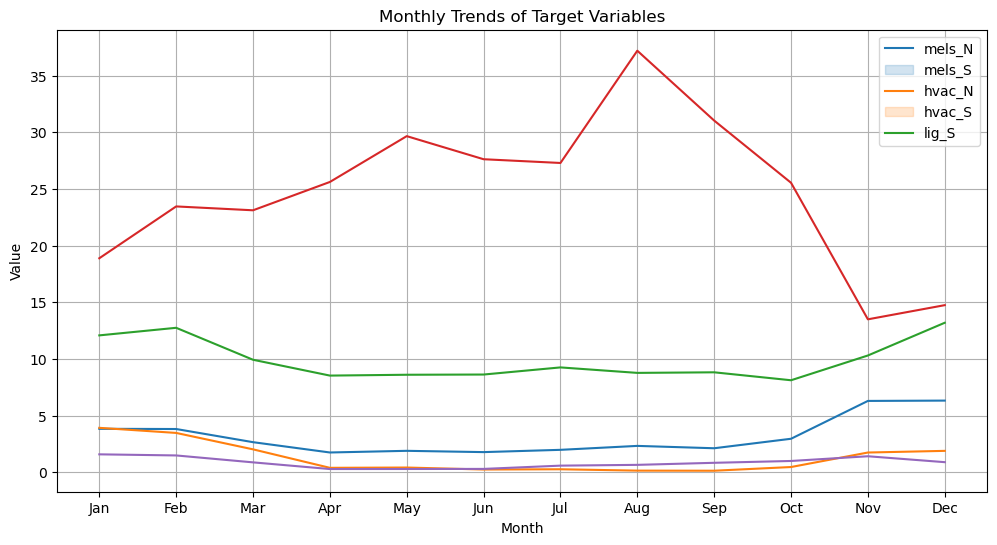

In [234]:
# Visualizing energy usage on a monthly basis
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d/%m/%Y %H:%M')

merged_df['month'] = merged_df['date'].dt.month

monthly_data = merged_df.groupby('month')[['mels_N', 'mels_S', 'hvac_N', 'hvac_S', 'lig_S']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, dashes=False)
plt.title('Monthly Trends of Target Variables')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['mels_N', 'mels_S', 'hvac_N', 'hvac_S', 'lig_S'])
plt.grid(True)
plt.show()


Importing the completely clean data for analysis and model training.

In [211]:
merged_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\merged_using_date_df.csv')

Performing scaling on the clean data

In [ ]:
#performing standardization before checking for multicollinearity and saving the scaled file

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_df = merged_df.drop(columns=['date']).copy() 
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled_df.to_csv('Scaled_df.csv', index=False) 

Importing the scaled data for analysis and model training.

In [250]:
scaled_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Scaled_df.csv')

In [251]:
#Checking for multicollinearity on scaled data
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_for_vif = scaled_df

vif_data = pd.DataFrame()
vif_data["Feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(len(features_for_vif.columns))]

print(vif_data)

                         Feature        VIF
0                         mels_S   4.886505
1                          lig_S   2.517647
2                         mels_N   7.562653
3                         hvac_N   2.037115
4                         hvac_S   8.380509
5                 air_temp_set_1  53.853273
6                 air_temp_set_2  40.619767
7   dew_point_temperature_set_1d  13.200925
8        relative_humidity_set_1  20.816468
9          solar_radiation_set_1   3.529818
10             cerc_templogger_1   4.704684
11            cerc_templogger_10  12.133764
12            cerc_templogger_11   6.140466
13            cerc_templogger_12   3.293704
14            cerc_templogger_13  24.705832
15            cerc_templogger_14  17.038119
16            cerc_templogger_15   2.005455
17            cerc_templogger_16   6.658797
18             cerc_templogger_2   4.371762
19             cerc_templogger_3   3.589645
20             cerc_templogger_4   6.792953
21             cerc_templogger_5

In [253]:
#Checking for multicollinearity on unscaled data
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_for_vif = merged_df

vif_data = pd.DataFrame()
vif_data["Feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(len(features_for_vif.columns))]

print(vif_data)

                         Feature          VIF
0                         mels_S     6.823032
1                          lig_S     3.455790
2                         mels_N    14.960393
3                         hvac_N     9.180944
4                         hvac_S    16.728810
5                 air_temp_set_1   400.444596
6                 air_temp_set_2   342.105204
7   dew_point_temperature_set_1d    32.078321
8        relative_humidity_set_1   187.075052
9          solar_radiation_set_1     5.171269
10             cerc_templogger_1   338.707392
11            cerc_templogger_10    40.341842
12            cerc_templogger_11   292.834503
13            cerc_templogger_12   182.943831
14            cerc_templogger_13  1759.225289
15            cerc_templogger_14   925.726703
16            cerc_templogger_15    13.847532
17            cerc_templogger_16   332.678139
18             cerc_templogger_2   398.562973
19             cerc_templogger_3   154.262702
20             cerc_templogger_4  

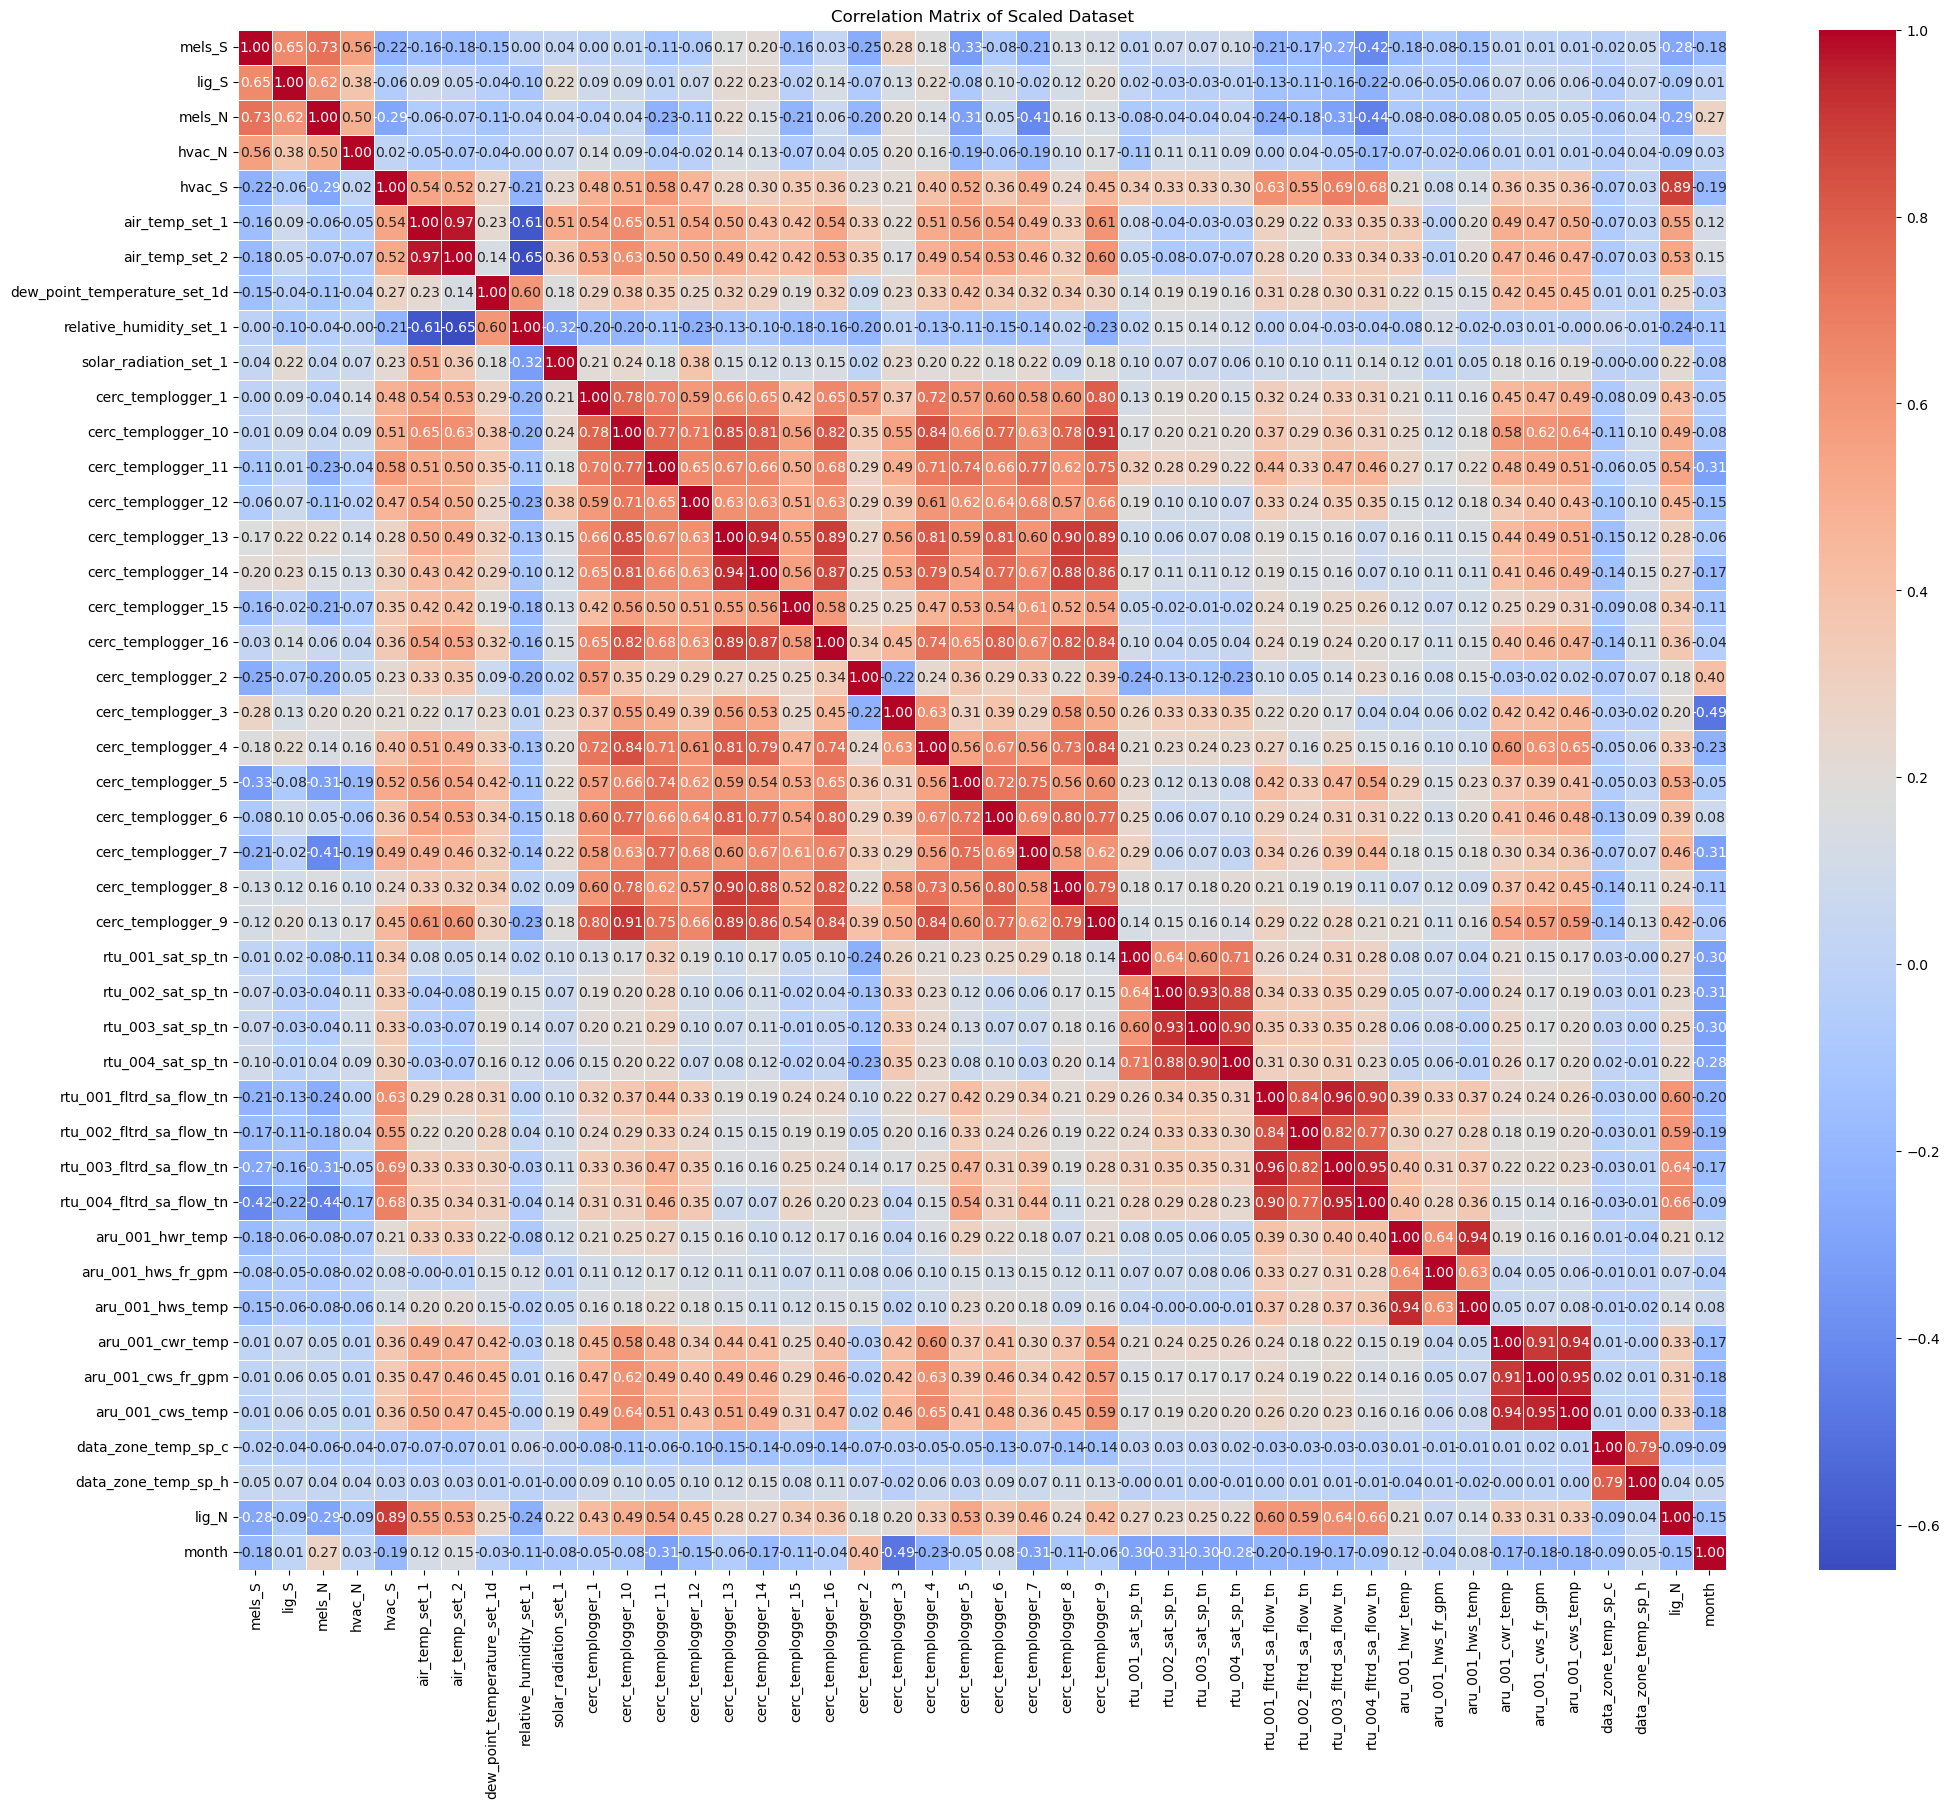

In [254]:
#correlation matrix of scaled data

correlation_matrix = scaled_df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Scaled Dataset')
plt.show()

In [255]:
#Removing highly correlated features from unscaled data

selected_columns = ['aru_001_cwr_temp', 'aru_001_cws_fr_gpm', 'aru_001_cws_temp', 'rtu_003_sat_sp_tn']
merged_df.drop(columns=selected_columns, inplace=True)

In [256]:
#Linear regression on unscaled data with and without polynomial features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = merged_df.drop(columns=['mels_N', 'mels_S', 'hvac_N', 'hvac_S', 'lig_S'])
y = merged_df[['mels_N', 'mels_S', 'hvac_N', 'hvac_S', 'lig_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_without_poly = []
y_preds_without_poly = []
models_with_poly = []
y_preds_with_poly = []

for i in range(5):
    model_without_poly = LinearRegression()
    model_without_poly.fit(X_train, y_train.iloc[:, i])
    y_pred_without_poly = model_without_poly.predict(X_test)
    
    mse_without_poly = mean_squared_error(y_test.iloc[:, i], y_pred_without_poly)
    r2_without_poly = r2_score(y_test.iloc[:, i], y_pred_without_poly)
    mae_without_poly = mean_absolute_error(y_test.iloc[:, i], y_pred_without_poly)
    
    models_without_poly.append(model_without_poly)
    y_preds_without_poly.append(y_pred_without_poly)

    print(f"For target variable {y.columns[i]} without Polynomial Features:")
    print("Mean Squared Error:", mse_without_poly)
    print("R-squared:", r2_without_poly)
    print("Mean Absolute Error:", mae_without_poly)
    print()
    
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model_with_poly = LinearRegression()
    model_with_poly.fit(X_train_poly, y_train.iloc[:, i])
    y_pred_with_poly = model_with_poly.predict(X_test_poly)
    
    mse_with_poly = mean_squared_error(y_test.iloc[:, i], y_pred_with_poly)
    r2_with_poly = r2_score(y_test.iloc[:, i], y_pred_with_poly)
    mae_with_poly = mean_absolute_error(y_test.iloc[:, i], y_pred_with_poly)
    
    models_with_poly.append(model_with_poly)
    y_preds_with_poly.append(y_pred_with_poly)
    
    print(f"For target variable {y.columns[i]} with Polynomial Features:")
    print("Mean Squared Error:", mse_with_poly)
    print("R-squared:", r2_with_poly)
    print("Mean Absolute Error:", mae_with_poly)
    print()


For target variable mels_N without Polynomial Features:
Mean Squared Error: 4.867330575085638
R-squared: 0.6960650190882893
Mean Absolute Error: 1.319376490999368

For target variable mels_N with Polynomial Features:
Mean Squared Error: 2.253820216398163
R-squared: 0.8592627326453267
Mean Absolute Error: 0.8818818941516738

For target variable mels_S without Polynomial Features:
Mean Squared Error: 2.4698951166304215
R-squared: 0.49630479046079323
Mean Absolute Error: 0.9906096063256926

For target variable mels_S with Polynomial Features:
Mean Squared Error: 0.8701586228835658
R-squared: 0.8225452056913116
Mean Absolute Error: 0.5684260979394032

For target variable hvac_N without Polynomial Features:
Mean Squared Error: 19.150545435310136
R-squared: 0.3606314294398818
Mean Absolute Error: 2.8420218935966

For target variable hvac_N with Polynomial Features:
Mean Squared Error: 6.826107202830767
R-squared: 0.7721005691714203
Mean Absolute Error: 1.5616745836877146

For target variable

In [257]:
#Removing highly correlated features from scaled data

selected_columns = ['aru_001_cwr_temp', 'aru_001_cws_fr_gpm', 'aru_001_cws_temp', 'rtu_003_sat_sp_tn']
scaled_df.drop(columns=selected_columns, inplace=True)

In [288]:
#Linear regression on scaled data with and without polynomial features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_scaled = scaled_df.drop(columns=['mels_N', 'mels_S', 'hvac_N', 'hvac_S', 'lig_S'])
y_scaled = scaled_df[['mels_N', 'mels_S', 'hvac_N', 'hvac_S', 'lig_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

models_without_poly_scaled = []
y_preds_without_poly_scaled = []

for i in range(5):
    model_without_poly_scaled = LinearRegression()
    model_without_poly_scaled.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_without_poly_scaled = model_without_poly_scaled.predict(X_test_scaled)
    
    models_without_poly_scaled.append(model_without_poly_scaled)
    y_preds_without_poly_scaled.append(y_pred_without_poly_scaled)

mses_without_poly_scaled = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i]) for i in range(5)]
print("Mean Squared Errors without Polynomial Features:", mses_without_poly)

r2_scores_without_poly_scaled = [r2_score(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i]) for i in range(5)]
print("R-squared without Polynomial Features:", r2_scores_without_poly)

maes_without_poly_scaled = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i]) for i in range(5)]
print("Mean Absolute Errors without Polynomial Features:", maes_without_poly)

models_with_poly_scaled = []
y_preds_with_poly_scaled = []

for i in range(5):  
    poly = PolynomialFeatures(degree=2)
    X_train_poly_scaled = poly.fit_transform(X_train_scaled)
    X_test_poly_scaled = poly.transform(X_test_scaled)
    
    model_with_poly_scaled = LinearRegression()
    model_with_poly_scaled.fit(X_train_poly_scaled, y_train_scaled.iloc[:, i])
    
    y_pred_with_poly_scaled = model_with_poly_scaled.predict(X_test_poly_scaled)
    
    models_with_poly_scaled.append(model_with_poly_scaled)
    y_preds_with_poly_scaled.append(y_pred_with_poly_scaled)

mses_with_poly_scaled = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i]) for i in range(5)]
print("Mean Squared Errors with Polynomial Features:", mses_with_poly_scaled)

r2_scores_with_poly_scaled = [r2_score(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i]) for i in range(5)]
print("R-squared with Polynomial Features:", r2_scores_with_poly_scaled)

maes_with_poly_scaled = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i]) for i in range(5)]
print("Mean Absolute Errors with Polynomial Features:", maes_with_poly_scaled)

Mean Squared Errors without Polynomial Features: [5.2813256774946264, 2.5259231678954004, 19.324775927639294, 47.36691212126493, 49.44110011495531, 1.6885754104304993]
R-squared without Polynomial Features: [0.669376203970834, 0.4888867252343917, 0.34825577064636415, 0.6964181797417441, 0.6650831702641828, 0.29794775528484874]
Mean Absolute Errors without Polynomial Features: [1.3930942531381207, 0.9713433517593753, 2.8015270335667615, 5.0197621732135245, 5.198759740631603, 0.9262578926249759]
Mean Squared Errors with Polynomial Features: [0.2674762039095554, 0.6080368493780666, 1.139553922857593, 0.2192525256947459, 0.6463286779227149]
R-squared with Polynomial Features: [0.7531998874467376, 0.41119703651446105, -0.08952523295191717, 0.7809889537590728, 0.37977770189888405]
Mean Absolute Errors with Polynomial Features: [0.23886025067669003, 0.2853310619310466, 0.31919984164578546, 0.17630876623441316, 0.44963309664833784]


In [263]:
#Random Forest Regressor on unscaled data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = merged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = merged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 50
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

for i in range(y.shape[1]):
    rf_regressor.fit(X_train, y_train.iloc[:, i])
    y_pred_RF = rf_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test.iloc[:, i], y_pred_RF)
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_RF)
    r2 = r2_score(y_test.iloc[:, i], y_pred_RF)
    
    print(f"For target variable {y.columns[i]}:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

For target variable mels_S:
Mean Squared Error: 0.1409409826794986
Mean Absolute Error: 0.16528561250327772
R-squared: 0.9712573633894778

For target variable lig_S:
Mean Squared Error: 0.5005821066076138
Mean Absolute Error: 0.3617852056570154
R-squared: 0.7909798250141526

For target variable mels_N:
Mean Squared Error: 0.5872850528223909
Mean Absolute Error: 0.4740694712716929
R-squared: 0.9633276457052302

For target variable hvac_N:
Mean Squared Error: 2.358762552159641
Mean Absolute Error: 0.7586245505780977
R-squared: 0.9212493113389685

For target variable hvac_S:
Mean Squared Error: 8.931325410180092
Mean Absolute Error: 1.8316507866819864
R-squared: 0.9447705235931344



In [264]:
#Random Forest Regression using scaled data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using scaled data
X_scaled = scaled_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaled_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

max_depth = 50
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

for i in range(y_scaled.shape[1]):
    rf_regressor.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_RF_scaled = rf_regressor.predict(X_test_scaled)
    
    mse_scaled = mean_squared_error(y_test_scaled.iloc[:, i], y_pred_RF_scaled)
    mae_scaled = mean_absolute_error(y_test_scaled.iloc[:, i], y_pred_RF_scaled)
    r2_scaled = r2_score(y_test_scaled.iloc[:, i], y_pred_RF_scaled)
    
    print(f"For target variable {y_scaled.columns[i]} (Scaled Data):")
    print("Mean Squared Error:", mse_scaled)
    print("Mean Absolute Error:", mae_scaled)
    print("R-squared:", r2_scaled)
    print()

For target variable mels_S (Scaled Data):
Mean Squared Error: 0.03570262263911711
Mean Absolute Error: 0.0848523342599286
R-squared: 0.9654267499813205

For target variable lig_S (Scaled Data):
Mean Squared Error: 0.21525325336707385
Mean Absolute Error: 0.2412377706631403
R-squared: 0.7934412133681739

For target variable mels_N (Scaled Data):
Mean Squared Error: 0.04589389745504271
Mean Absolute Error: 0.12627449429543036
R-squared: 0.9576537318391044

For target variable hvac_N (Scaled Data):
Mean Squared Error: 0.09035975369170944
Mean Absolute Error: 0.14976875091779615
R-squared: 0.9136072197061441

For target variable hvac_S (Scaled Data):
Mean Squared Error: 0.034716886419369826
Mean Absolute Error: 0.11038155338927672
R-squared: 0.9653213499236063



In [269]:
#Support Vector Regression on unscaled data

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = merged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = merged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_regressor = SVR(kernel='rbf')

for i in range(y.shape[1]):
    svr_regressor.fit(X_train, y_train.iloc[:, i])
    y_pred_SVR = svr_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test.iloc[:, i], y_pred_SVR)
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_SVR)
    r2 = r2_score(y_test.iloc[:, i], y_pred_SVR)
    
    print(f"For target variable {y.columns[i]}:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

For target variable mels_S:
Mean Squared Error: 3.5878038094597446
Mean Absolute Error: 0.8013359745285944
R-squared: 0.26832537162273284

For target variable lig_S:
Mean Squared Error: 2.689917480644289
Mean Absolute Error: 0.8239376048207652
R-squared: -0.12318641653422469

For target variable mels_N:
Mean Squared Error: 9.341924541057043
Mean Absolute Error: 1.5790886666062676
R-squared: 0.4166540338150636

For target variable hvac_N:
Mean Squared Error: 25.658502791209923
Mean Absolute Error: 2.666037487257669
R-squared: 0.14335388995864307

For target variable hvac_S:
Mean Squared Error: 52.56470993877143
Mean Absolute Error: 5.066904691858563
R-squared: 0.6749506625200244



In [270]:
#Support Vector Regression on scaled data

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using scaled data
X_scaled = scaled_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaled_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr_regressor = SVR(kernel='rbf') 

for i in range(y_scaled.shape[1]):
    svr_regressor.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_SVR_scaled = svr_regressor.predict(X_test_scaled)
    
    mse_scaled = mean_squared_error(y_test_scaled.iloc[:, i], y_pred_SVR_scaled)
    mae_scaled = mean_absolute_error(y_test_scaled.iloc[:, i], y_pred_SVR_scaled)
    r2_scaled = r2_score(y_test_scaled.iloc[:, i], y_pred_SVR_scaled)
    
    print(f"For target variable {y_scaled.columns[i]} (Scaled Data):")
    print("Mean Squared Error:", mse_scaled)
    print("Mean Absolute Error:", mae_scaled)
    print("R-squared:", r2_scaled)
    print()

For target variable mels_S (Scaled Data):
Mean Squared Error: 0.13573803884839086
Mean Absolute Error: 0.17069736981153877
R-squared: 0.8685557304406841

For target variable lig_S (Scaled Data):
Mean Squared Error: 0.41525509059525983
Mean Absolute Error: 0.3348972606880781
R-squared: 0.6015178106982035

For target variable mels_N (Scaled Data):
Mean Squared Error: 0.14309695547072135
Mean Absolute Error: 0.17794416796820664
R-squared: 0.8679645359100987

For target variable hvac_N (Scaled Data):
Mean Squared Error: 0.1667792210018822
Mean Absolute Error: 0.20167263992558723
R-squared: 0.8405427194195857

For target variable hvac_S (Scaled Data):
Mean Squared Error: 0.04523424662568611
Mean Absolute Error: 0.13512769733323374
R-squared: 0.9548155732846408



In [135]:
#Gradient Boosting Regression on unscaled data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = merged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = merged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_regressor = GradientBoostingRegressor()

models_gb = []
y_preds_gb = []


for i in range(5):
    
    gb_regressor.fit(X_train, y_train.iloc[:, i])
    
    
    y_pred_gb = gb_regressor.predict(X_test)
    
    
    models_gb.append(gb_regressor)
    y_preds_gb.append(y_pred_gb)

mses_gb = [mean_squared_error(y_test.iloc[:, i], y_preds_gb[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test.iloc[:, i], y_preds_gb[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test.iloc[:, i], y_preds_gb[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)

Mean Squared Errors with Gradient Boosting Regression: [0.6686914906892493, 0.8871085793376778, 1.6940616877052583, 4.898941659094805, 16.06888723890582]
R-squared with Gradient Boosting Regression: [0.8636311727360668, 0.6295840621607476, 0.8942162241144062, 0.8364417694308802, 0.9006333116432897]
Mean Absolute Errors with Gradient Boosting Regression: [0.43991824044263217, 0.5905704660769094, 0.7788822027639773, 1.2295564205447622, 2.648932504362352]


In [299]:
#Gradient Boosting Regression on scaled data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Using scaled data
X_scaled = scaled_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaled_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor()

models_gb_scaled = []
y_preds_gb_scaled = []

for i in range(5):
    gb_regressor.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_gb_scaled = gb_regressor.predict(X_test_scaled)
    models_gb_scaled.append(gb_regressor)
    y_preds_gb_scaled.append(y_pred_gb_scaled)

mses_gb = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)

Mean Squared Errors with Gradient Boosting Regression: [0.1559674222125263, 0.40671521809930733, 0.13036272967075735, 0.19851817360119084, 0.05427809048304537]
R-squared with Gradient Boosting Regression: [0.8489662583774837, 0.6097127423573608, 0.879714397448333, 0.8101971701386036, 0.9457816900991971]
Mean Absolute Errors with Gradient Boosting Regression: [0.2067818092522621, 0.3985892926135912, 0.2143881018611915, 0.25551141363071644, 0.15057507256392907]


In [145]:
#Gradient Boosting Regression on unscaled data using polynomial features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = merged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = merged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

gb_regressor = GradientBoostingRegressor()

models_gb_poly = []
y_preds_gb_poly = []

for i in range(5):
    gb_regressor.fit(X_train_poly, y_train.iloc[:, i])
    
    y_preds_gb_poly_current = gb_regressor.predict(X_test_poly)
    
    models_gb_poly.append(gb_regressor)
    y_preds_gb_poly.append(y_preds_gb_poly_current)

mses_gb = [mean_squared_error(y_test.iloc[:, i], y_preds_gb_poly[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test.iloc[:, i], y_preds_gb_poly[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test.iloc[:, i], y_preds_gb_poly[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)

Mean Squared Errors with Gradient Boosting Regression: [0.4583076742645747, 0.8152671313091254, 1.3652074184842604, 4.22221507764174, 14.502341088291347]
R-squared with Gradient Boosting Regression: [0.9065355534865556, 0.6595817625178948, 0.9147511589203619, 0.8590352620551635, 0.9103205103167377]
Mean Absolute Errors with Gradient Boosting Regression: [0.3468697631593915, 0.5434795905320978, 0.7127434336833144, 1.1295371123446925, 2.527426622417782]


In [303]:
#Gradient Boosting Regression on scaled data using polynomial features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_scaled = scaled_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaled_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

degree = 2 
poly = PolynomialFeatures(degree)
X_train_poly_scaled = poly.fit_transform(X_train_scaled)
X_test_poly_scaled = poly.transform(X_test_scaled)

gb_regressor = GradientBoostingRegressor()

models_gb_poly_scaled = []
y_preds_gb_poly_scaled = []

for i in range(5):
    gb_regressor.fit(X_train_poly_scaled, y_train_scaled.iloc[:, i])
    
    y_preds_gb_poly_scaled_current = gb_regressor.predict(X_test_poly_scaled)
    
    models_gb_poly_scaled.append(gb_regressor)
    y_preds_gb_poly_scaled.append(y_preds_gb_poly_scaled_current)

mses_gb = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)


Mean Squared Errors with Gradient Boosting Regression: [0.11923103396150224, 0.3647158404629378, 0.09341537343603548, 0.16355621733805137, 0.05001081453605087]
R-squared with Gradient Boosting Regression: [0.8845405731448915, 0.6500156894587743, 0.9138056980724372, 0.8436242267947124, 0.9500442661711881]
Mean Absolute Errors with Gradient Boosting Regression: [0.18302556801067685, 0.3704124696557848, 0.1889096174306207, 0.23008259496413672, 0.14203730081456054]


Implementing Cross-Validation to assess the performance of the models using the scaled and unscaled data.
We start with assessing the performance of the models without using polynomial features.

In [45]:
#Cross validation for all models, scaled data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
svr_regressor = SVR(kernel='rbf')
gb_regressor = GradientBoostingRegressor()

models = {
    "Linear Regression": linear_regressor,
    "Random Forest": rf_regressor,
    "SVR": svr_regressor,
    "Gradient Boosting": gb_regressor
}

for i in range(y.shape[1]):
    y_target = y.iloc[:, i]
    
    for name, model in models.items():
        cv_mse = cross_val_score(model, X, y_target, scoring='neg_mean_squared_error', cv=kf)
        cv_r2 = cross_val_score(model, X, y_target, scoring='r2', cv=kf)
        cv_mae = cross_val_score(model, X, y_target, scoring='neg_mean_absolute_error', cv=kf)

        cv_mse = -cv_mse
        cv_mae = -cv_mae

        mean_mse = cv_mse.mean()
        mean_r2 = cv_r2.mean()
        mean_mae = cv_mae.mean()

        print(f"Model: {name}, Target Variable: {y.columns[i]}")
        print(f"Mean Squared Error: {mean_mse}")
        print(f"R-squared: {mean_r2}")
        print(f"Mean Absolute Error: {mean_mae}\n")

Model: Linear Regression, Target Variable: mels_S
Mean Squared Error: 2.4246048145172736
R-squared: 0.49420334415366207
Mean Absolute Error: 0.9713536920253315

Model: Random Forest, Target Variable: mels_S
Mean Squared Error: 0.13143781817544198
R-squared: 0.9725857363070849
Mean Absolute Error: 0.15988830825376626

Model: SVR, Target Variable: mels_S
Mean Squared Error: 3.4745472265245803
R-squared: 0.27539720845783267
Mean Absolute Error: 0.784096157676088

Model: Gradient Boosting, Target Variable: mels_S
Mean Squared Error: 0.6530952528764022
R-squared: 0.8636919153921804
Mean Absolute Error: 0.4338475363576711

Model: Linear Regression, Target Variable: lig_S
Mean Squared Error: 1.6700249712389048
R-squared: 0.27701820378309944
Mean Absolute Error: 0.9366916198410251

Model: Random Forest, Target Variable: lig_S
Mean Squared Error: 0.47791509636465523
R-squared: 0.7931113558695719
Mean Absolute Error: 0.3537102069296961

Model: SVR, Target Variable: lig_S
Mean Squared Error: 2.57

In [97]:
#Cross validation for all models, scaled data

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
svr_regressor = SVR(kernel='rbf')
gb_regressor = GradientBoostingRegressor()

models = {
    "Linear Regression": linear_regressor,
    "Random Forest": rf_regressor,
    "SVR": svr_regressor,
    "Gradient Boosting": gb_regressor
}

for i in range(y_scaled.shape[1]):
    y_target_scaled = y.iloc[:, i]
    
    for name, model in models.items():
        cv_mse = cross_val_score(model, X_scaled, y_target_scaled, scoring='neg_mean_squared_error', cv=kf)
        cv_r2 = cross_val_score(model, X_scaled, y_target_scaled, scoring='r2', cv=kf)
        cv_mae = cross_val_score(model, X_scaled, y_target_scaled, scoring='neg_mean_absolute_error', cv=kf)

        cv_mse = -cv_mse
        cv_mae = -cv_mae

        mean_mse = cv_mse.mean()
        mean_r2 = cv_r2.mean()
        mean_mae = cv_mae.mean()

        print(f"Model: {name}, Target Variable: {y.columns[i]}")
        print(f"Mean Squared Error: {mean_mse}")
        print(f"R-squared: {mean_r2}")
        print(f"Mean Absolute Error: {mean_mae}\n")

Model: Linear Regression, Target Variable: mels_S
Mean Squared Error: 2.5232044172919523
R-squared: 0.47363686374911557
Mean Absolute Error: 0.9723422570432906

Model: Random Forest, Target Variable: mels_S
Mean Squared Error: 0.16429800819432547
R-squared: 0.9657241847399762
Mean Absolute Error: 0.1778609725198473

Model: SVR, Target Variable: mels_S
Mean Squared Error: 0.8209258495027474
R-squared: 0.8288424626705586
Mean Absolute Error: 0.39514333256696915

Model: Gradient Boosting, Target Variable: mels_S
Mean Squared Error: 0.7419974538031409
R-squared: 0.845135037857116
Mean Absolute Error: 0.45030079359748837

Model: Linear Regression, Target Variable: lig_S
Mean Squared Error: 1.6959255879738304
R-squared: 0.26582627965166833
Mean Absolute Error: 0.9391754708297266

Model: Random Forest, Target Variable: lig_S
Mean Squared Error: 0.489260213847425
R-squared: 0.7881893589826431
Mean Absolute Error: 0.3650794347063223

Model: SVR, Target Variable: lig_S
Mean Squared Error: 0.9919

In [127]:
#Cross validation for linear regression and gradient boosting on unscaled data
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
svr_regressor = SVR(kernel='rbf')
gb_regressor = GradientBoostingRegressor()

kf = KFold(n_splits=4, shuffle=True, random_state=42)

models = {
    "Linear Regression": linear_regressor,
    "Gradient Boosting": gb_regressor
}

for i in range(y.shape[1]):
    y_target = y.iloc[:, i]
    
    for name, model in models.items():
        model_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), model)
        
        cv_mses = cross_val_score(model_pipeline, X, y_target, scoring='neg_mean_squared_error', cv=kf)
        cv_r2 = cross_val_score(model_pipeline, X, y_target, scoring='r2', cv=kf)
        cv_maes = cross_val_score(model_pipeline, X, y_target, scoring='neg_mean_absolute_error', cv=kf)
    
        cv_mses = -cv_mses
        cv_maes = -cv_maes
    
        mean_mse = cv_mses.mean()
        mean_r2 = cv_r2.mean()
        mean_mae = cv_maes.mean()
    
        print(f"Model: {name}")
        print(f"Mean Squared Error: {mean_mse}")
        print(f"R-squared: {mean_r2}")
        print(f"Mean Absolute Error: {mean_mae}\n")

Model: Linear Regression
Mean Squared Error: 1.628067895735217
R-squared: 0.6590299022218924
Mean Absolute Error: 0.5983282397846035

Model: Gradient Boosting
Mean Squared Error: 0.43449540844372975
R-squared: 0.909557093877659
Mean Absolute Error: 0.33483423094831033

Model: Linear Regression
Mean Squared Error: 1.5847281396986856
R-squared: 0.3157213181875919
Mean Absolute Error: 0.6493835353081397

Model: Gradient Boosting
Mean Squared Error: 0.7598139281484686
R-squared: 0.6712229932842124
Mean Absolute Error: 0.5248132665053206

Model: Linear Regression
Mean Squared Error: 3.440771139491371
R-squared: 0.766358244845813
Mean Absolute Error: 0.8897180804254878

Model: Gradient Boosting
Mean Squared Error: 1.28373203953847
R-squared: 0.913076495904863
Mean Absolute Error: 0.6899935203446191

Model: Linear Regression
Mean Squared Error: 13.360166726704355
R-squared: 0.5431519913288249
Mean Absolute Error: 1.5682021194039686

Model: Gradient Boosting
Mean Squared Error: 4.3371436496466

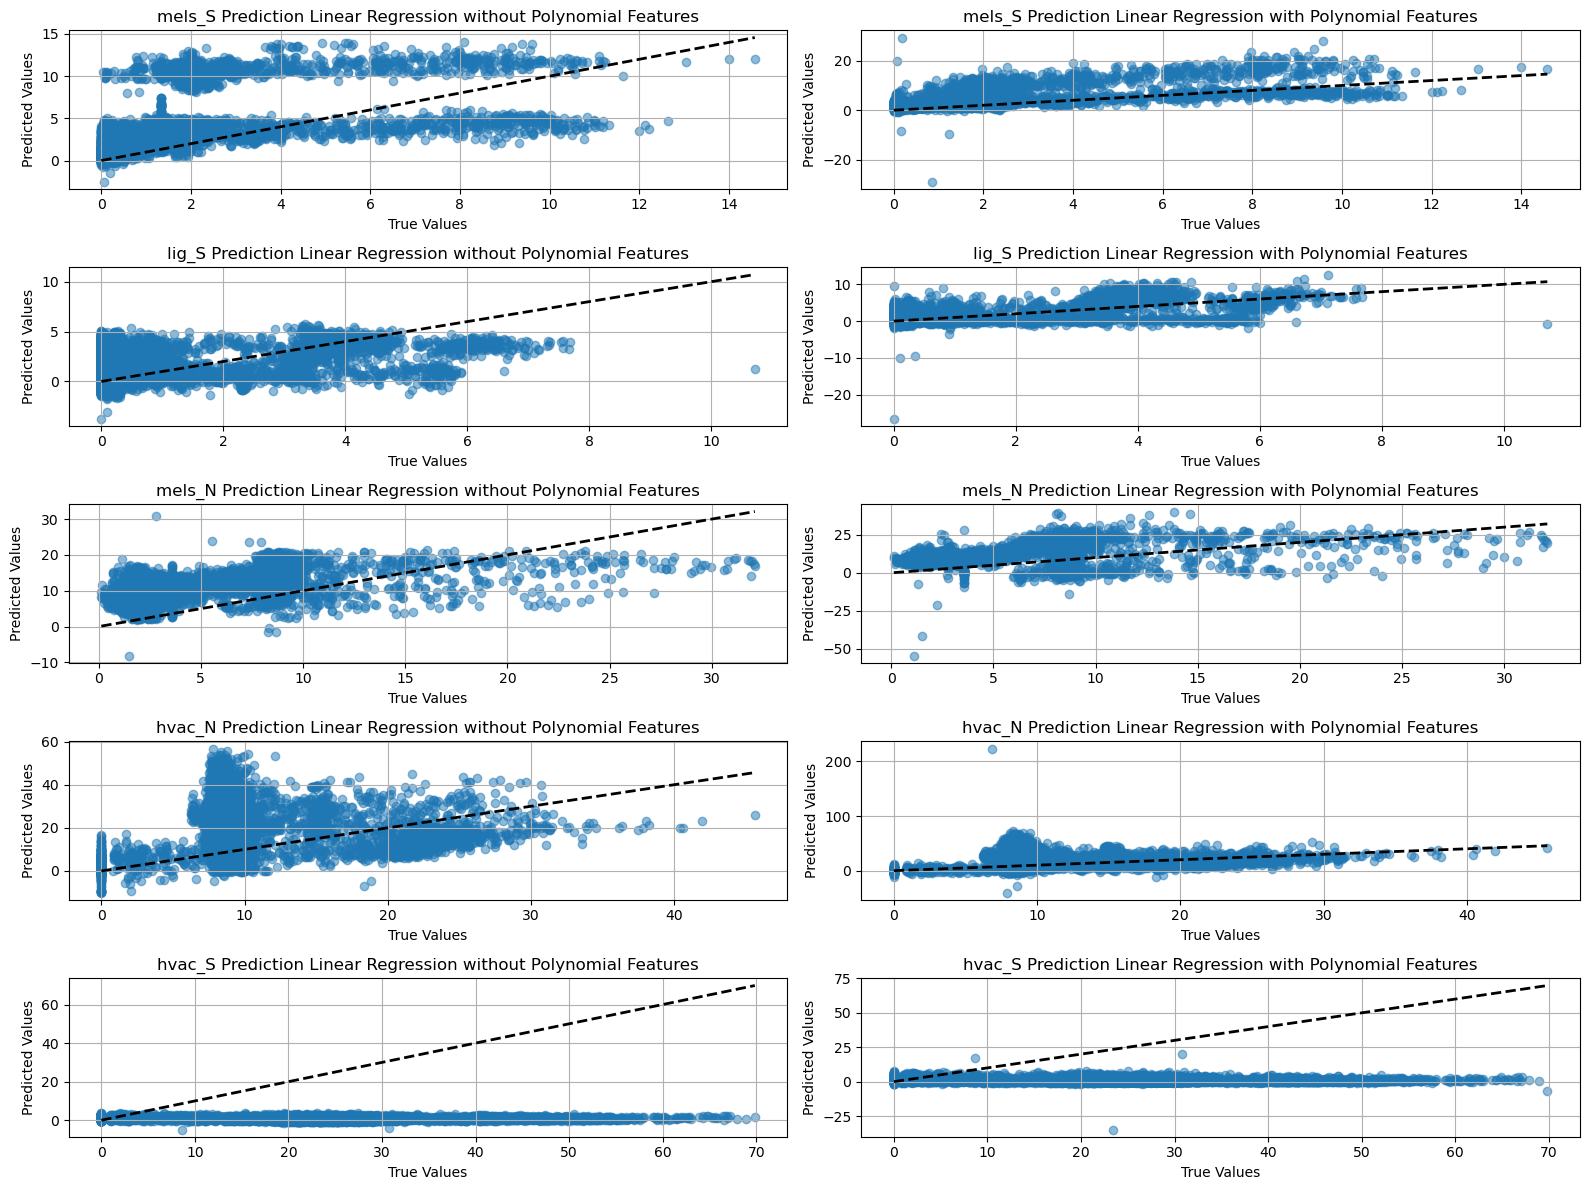

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

for i in range(5):
    # Plotting LR without polynomial features
    plt.subplot(5, 2, 2*i+1)
    plt.scatter(y_test.iloc[:, i], y_preds_without_poly[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction Linear Regression without Polynomial Features')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    # Plotting LR with polynomial features
    plt.subplot(5, 2, 2*i+2)
    plt.scatter(y_test.iloc[:, i], y_preds_with_poly[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction Linear Regression with Polynomial Features')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

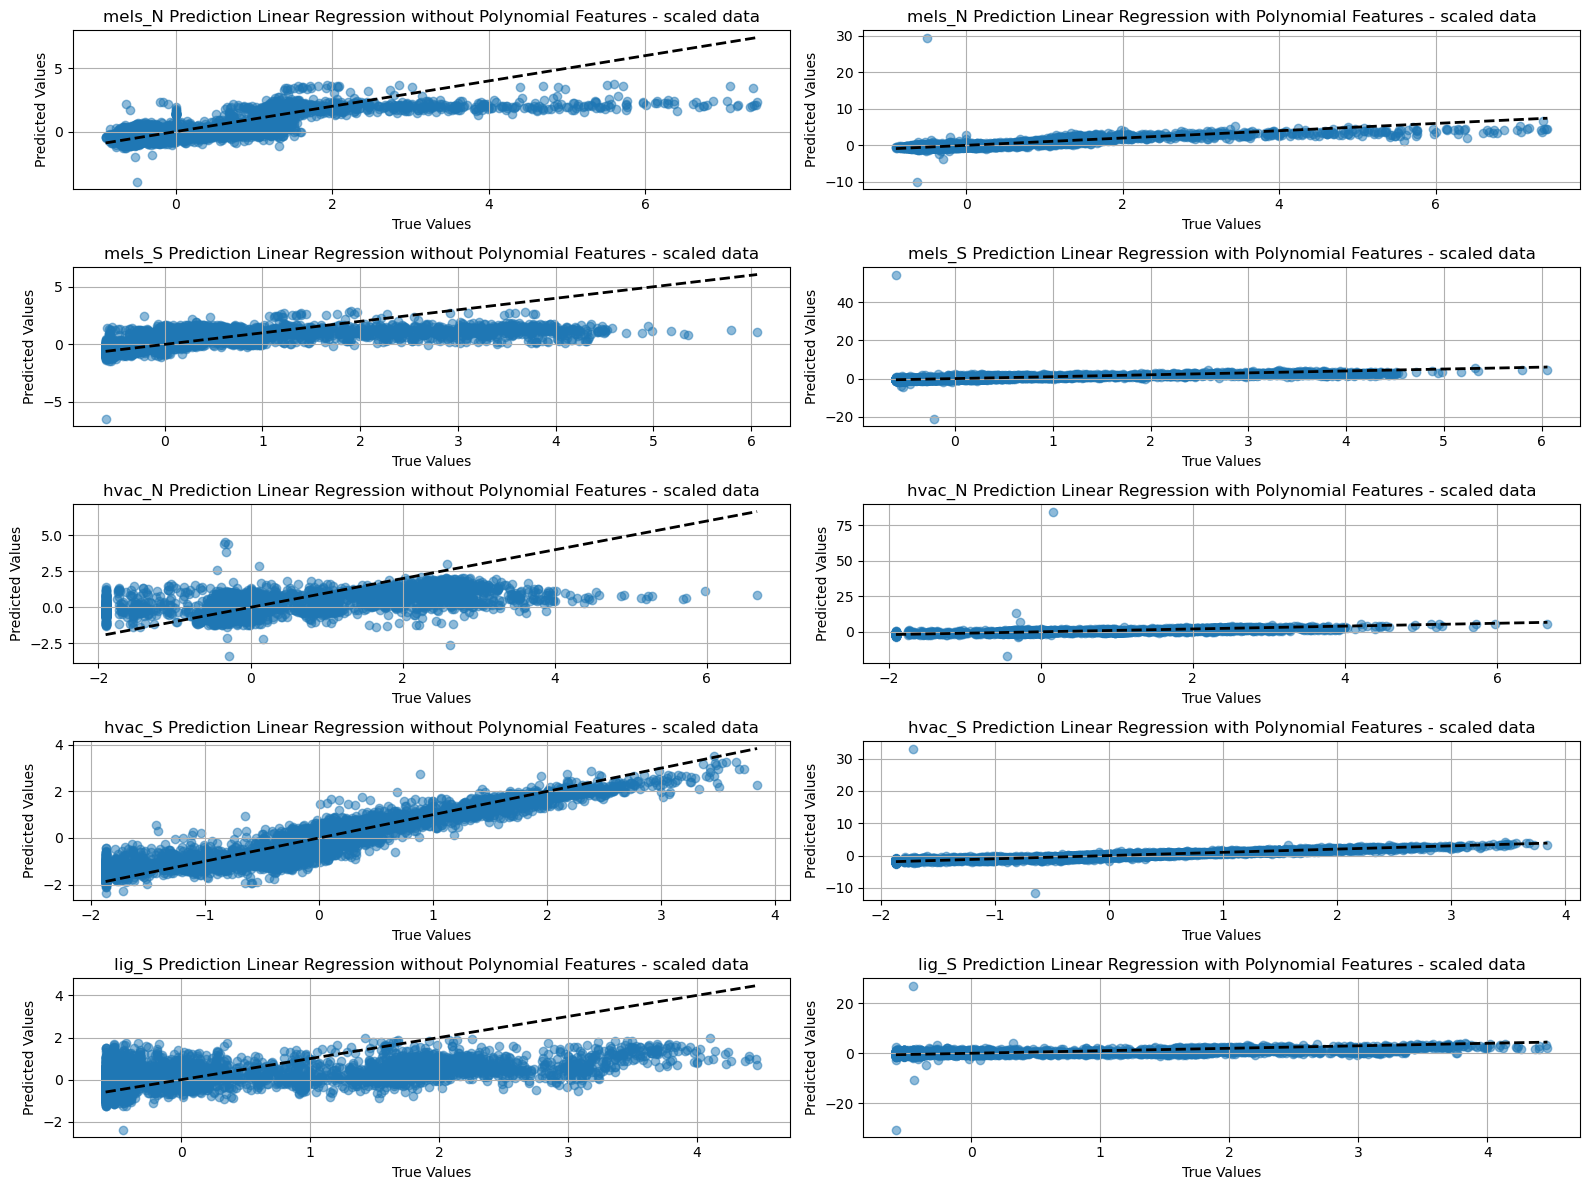

In [292]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

for i in range(5):
    # Plotting LR scaled without polynomial features
    plt.subplot(5, 2, 2*i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction Linear Regression without Polynomial Features - scaled data')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    # Plotting LR scaled with polynomial features
    plt.subplot(5, 2, 2*i+2)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction Linear Regression with Polynomial Features - scaled data')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

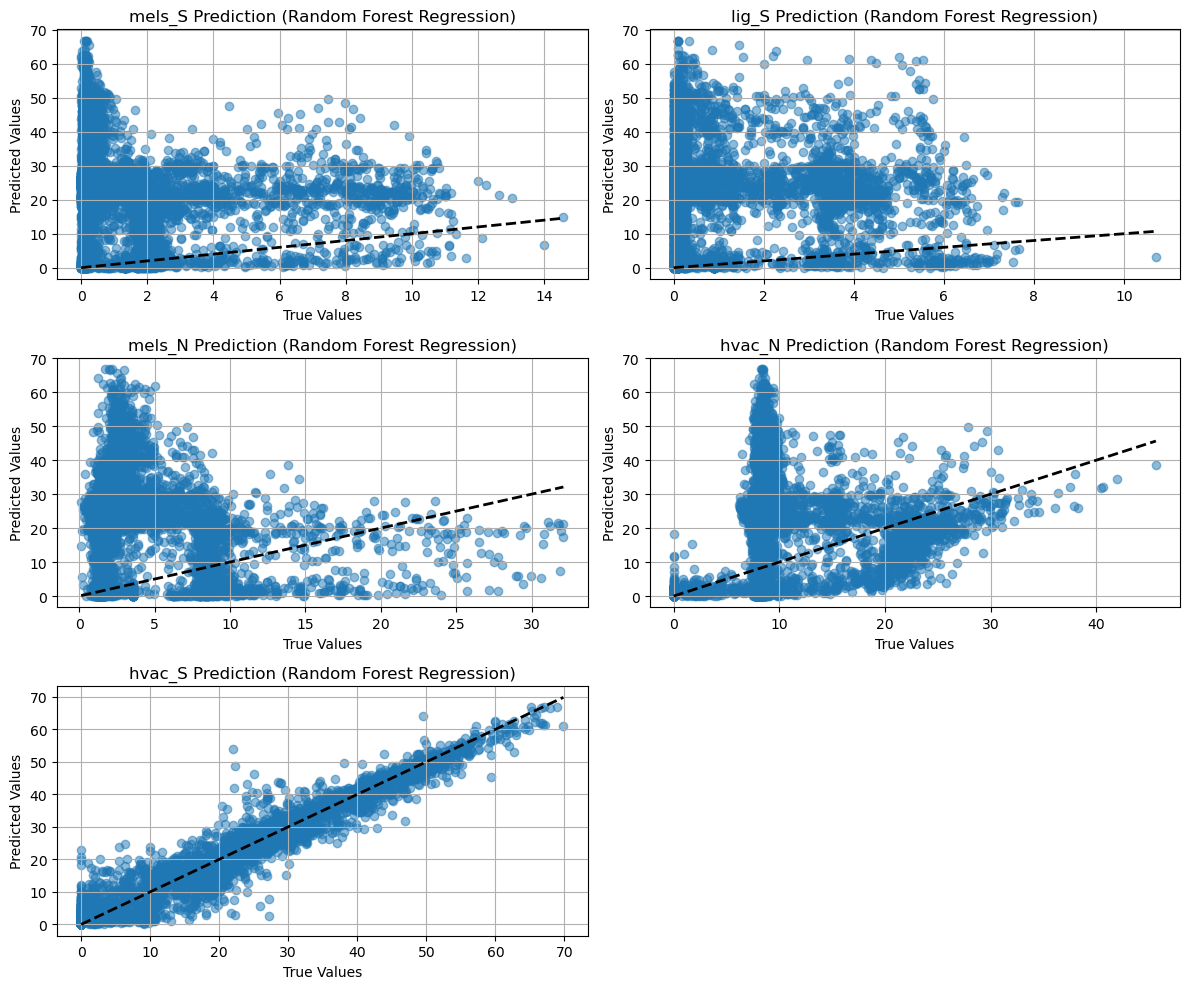

In [293]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plotting the graph for RFR
for i in range(y.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred_RF, alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (Random Forest Regression)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


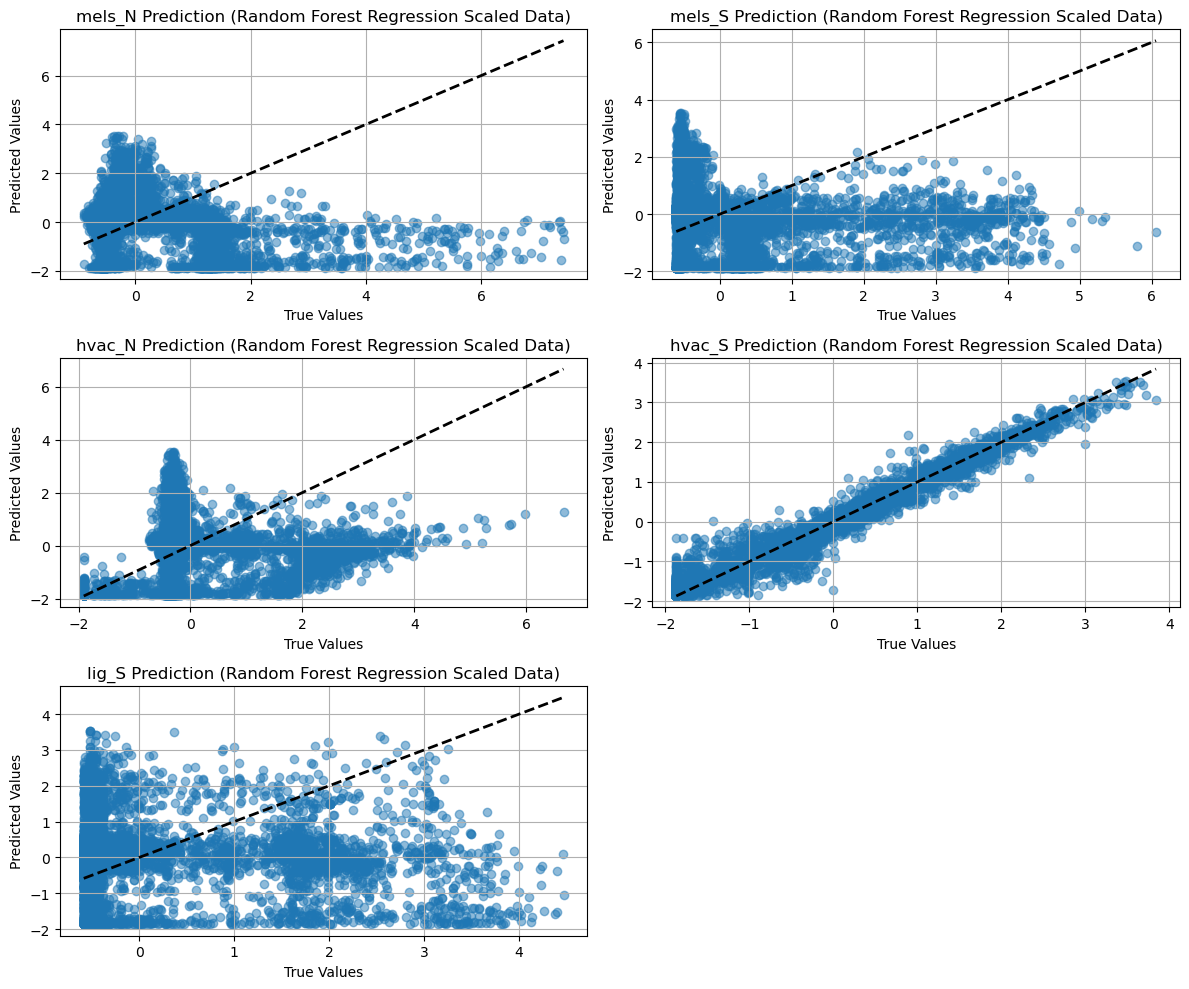

In [294]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plotting the graph for RFR
for i in range(y_scaled.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_pred_RF_scaled, alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction (Random Forest Regression Scaled Data)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

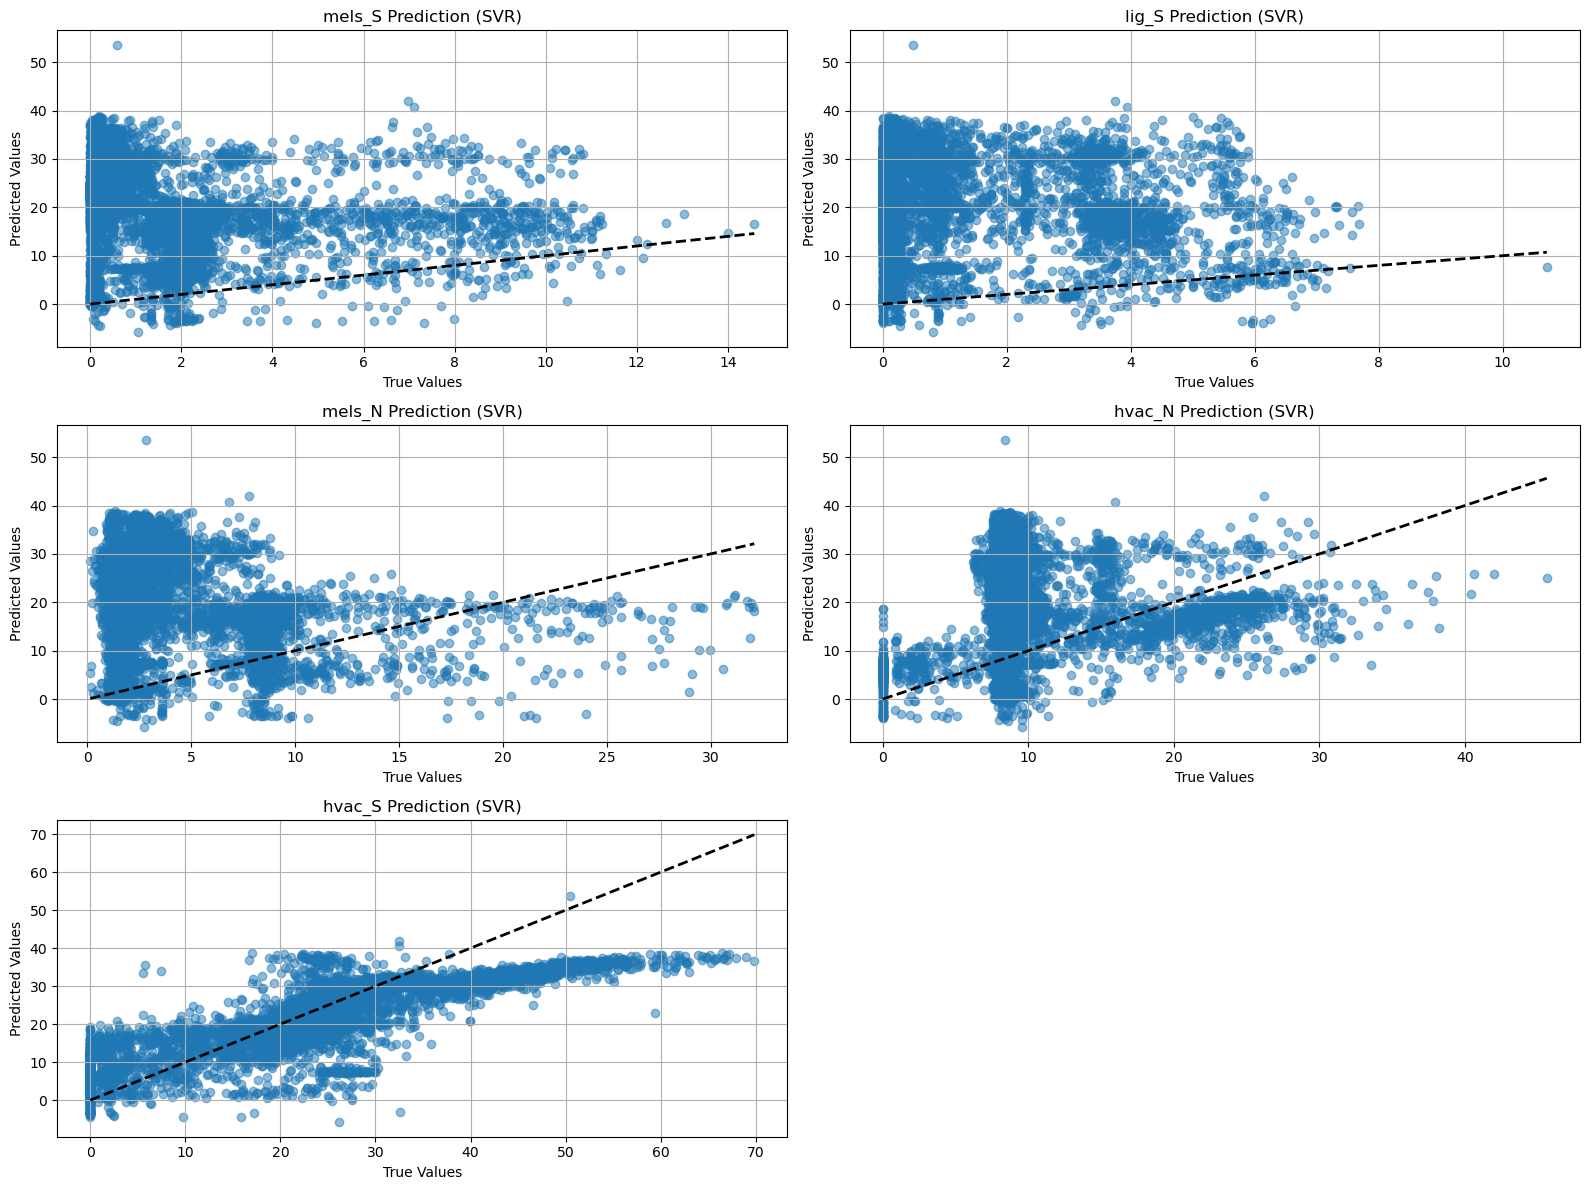

In [295]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for SVR
for i in range(y.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred_SVR, alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (SVR)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


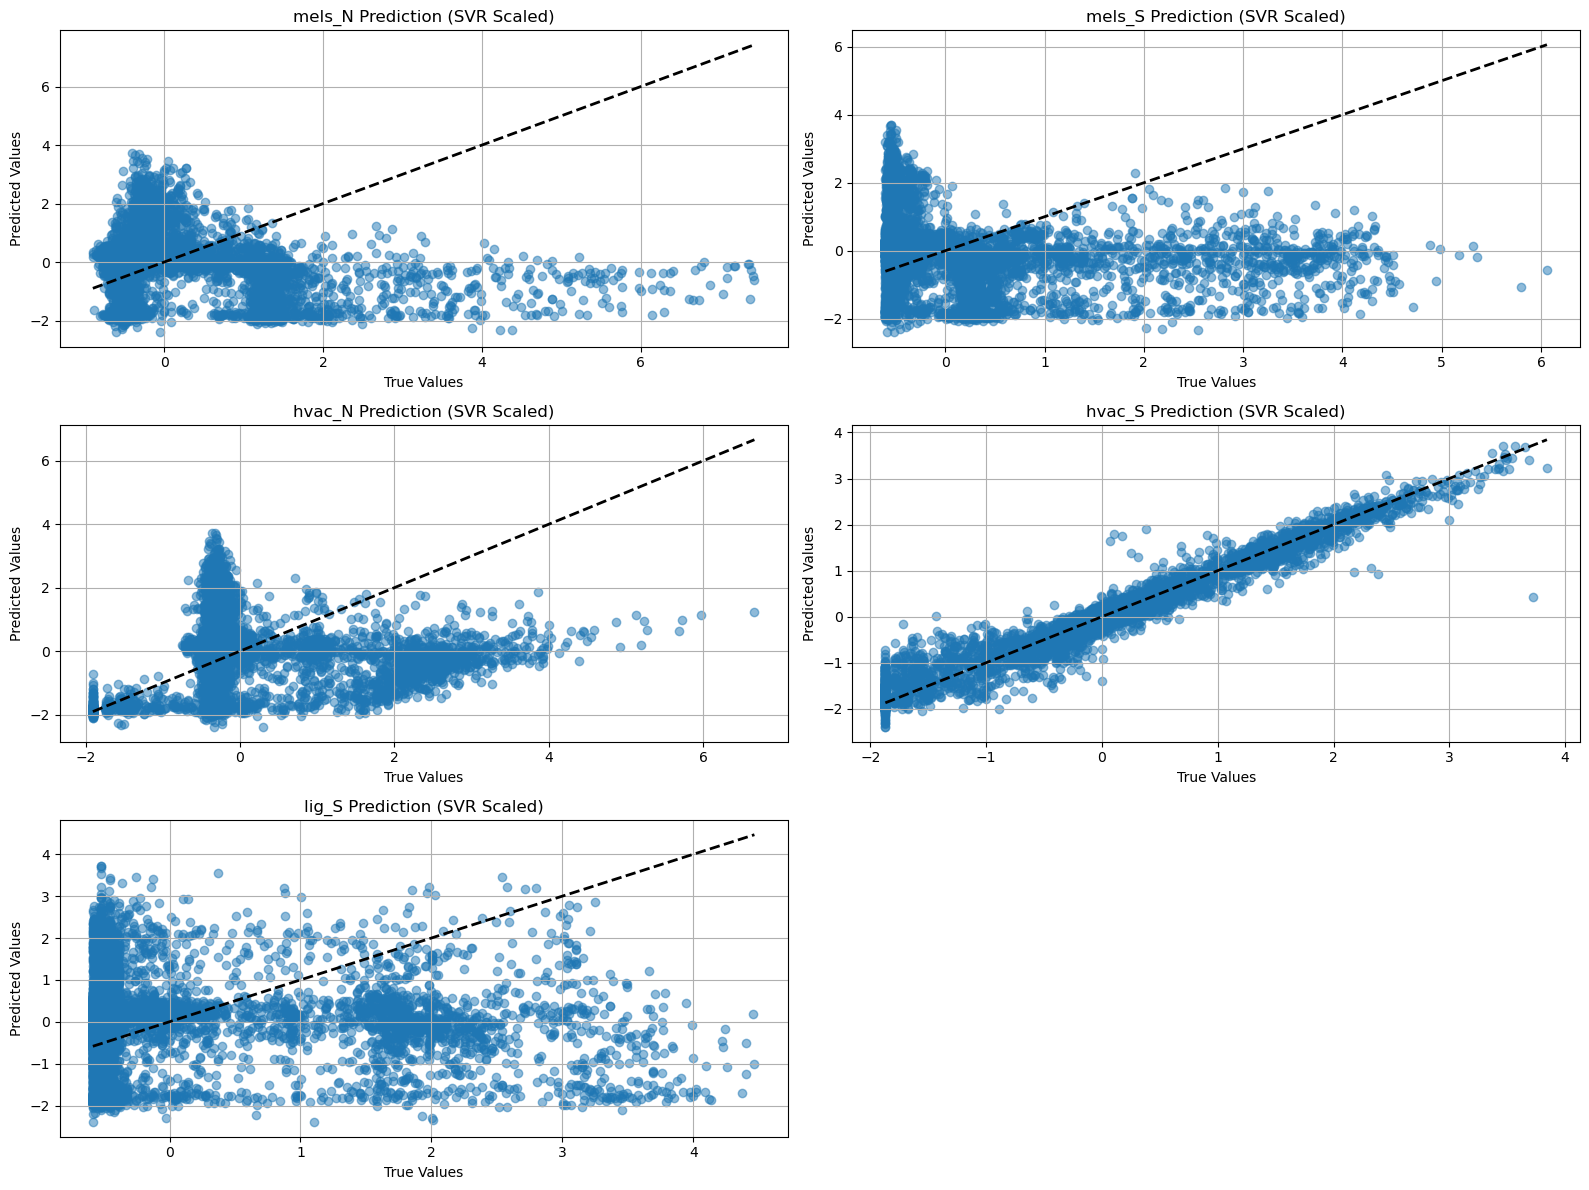

In [296]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for SVR (scaled)
for i in range(y_scaled.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_pred_SVR_scaled, alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction (SVR Scaled)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

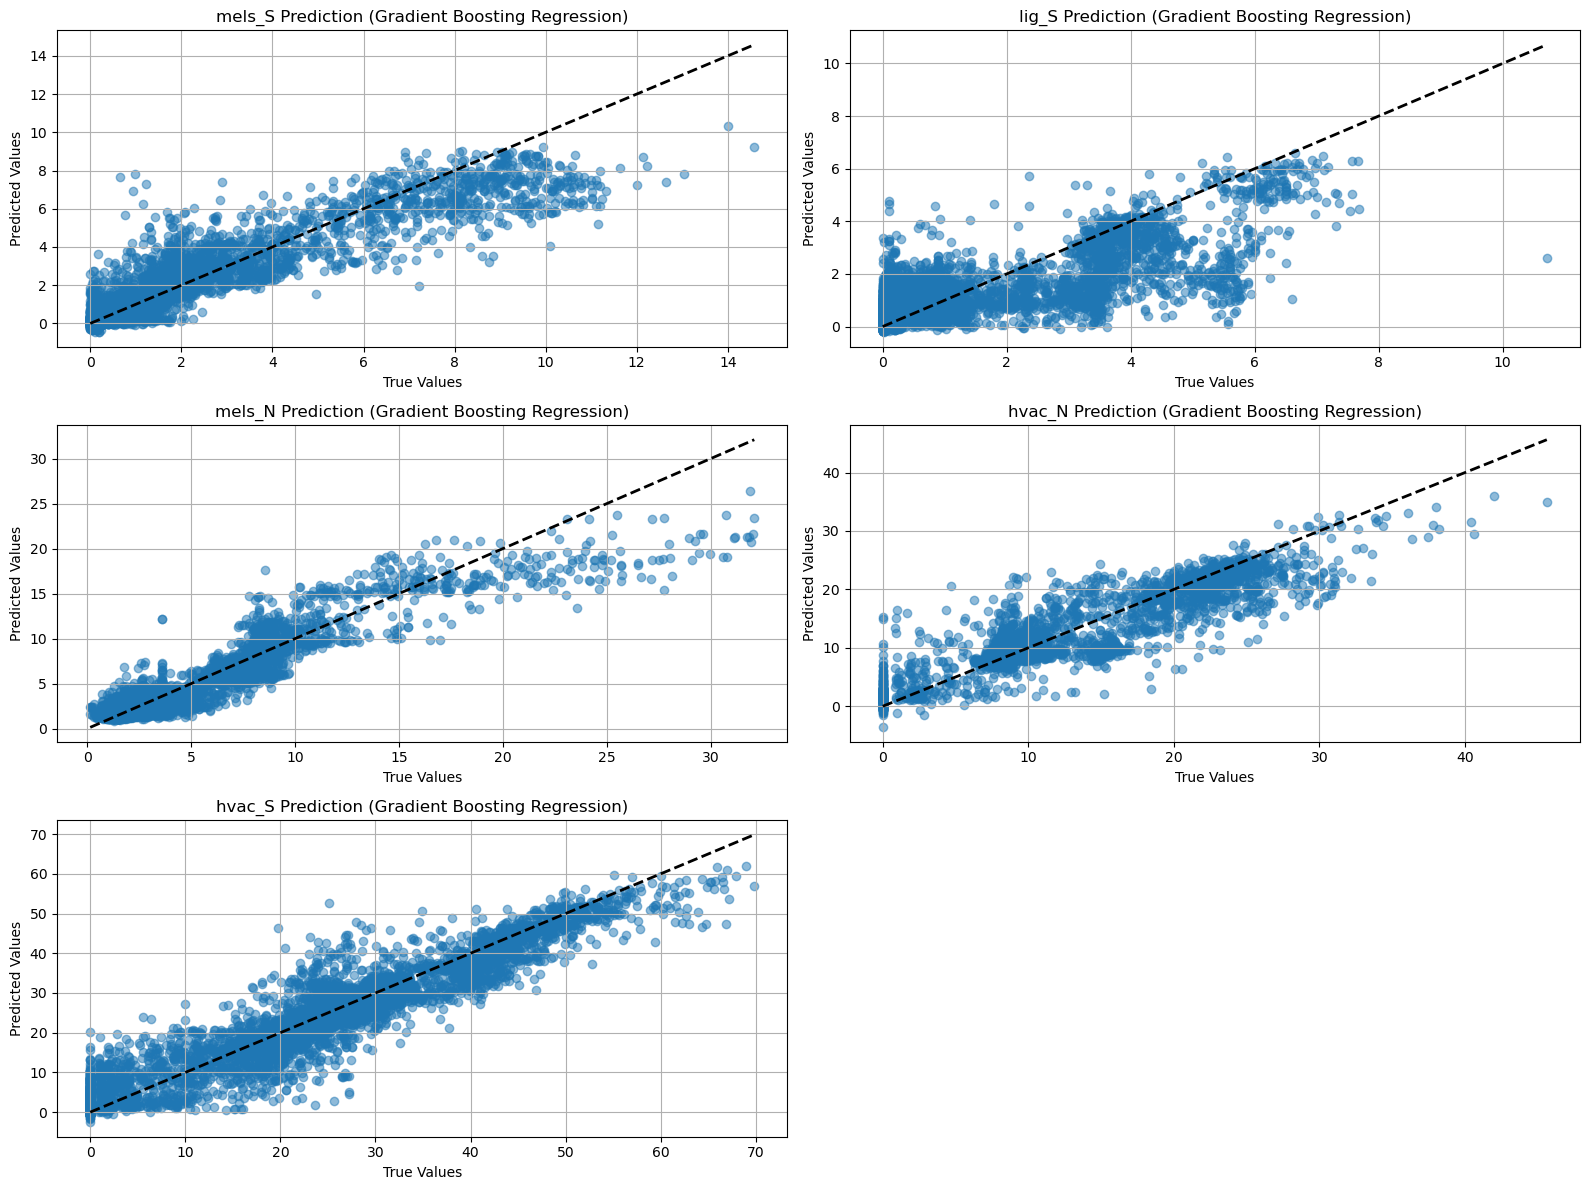

In [297]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_preds_gb[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (Gradient Boosting Regression)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

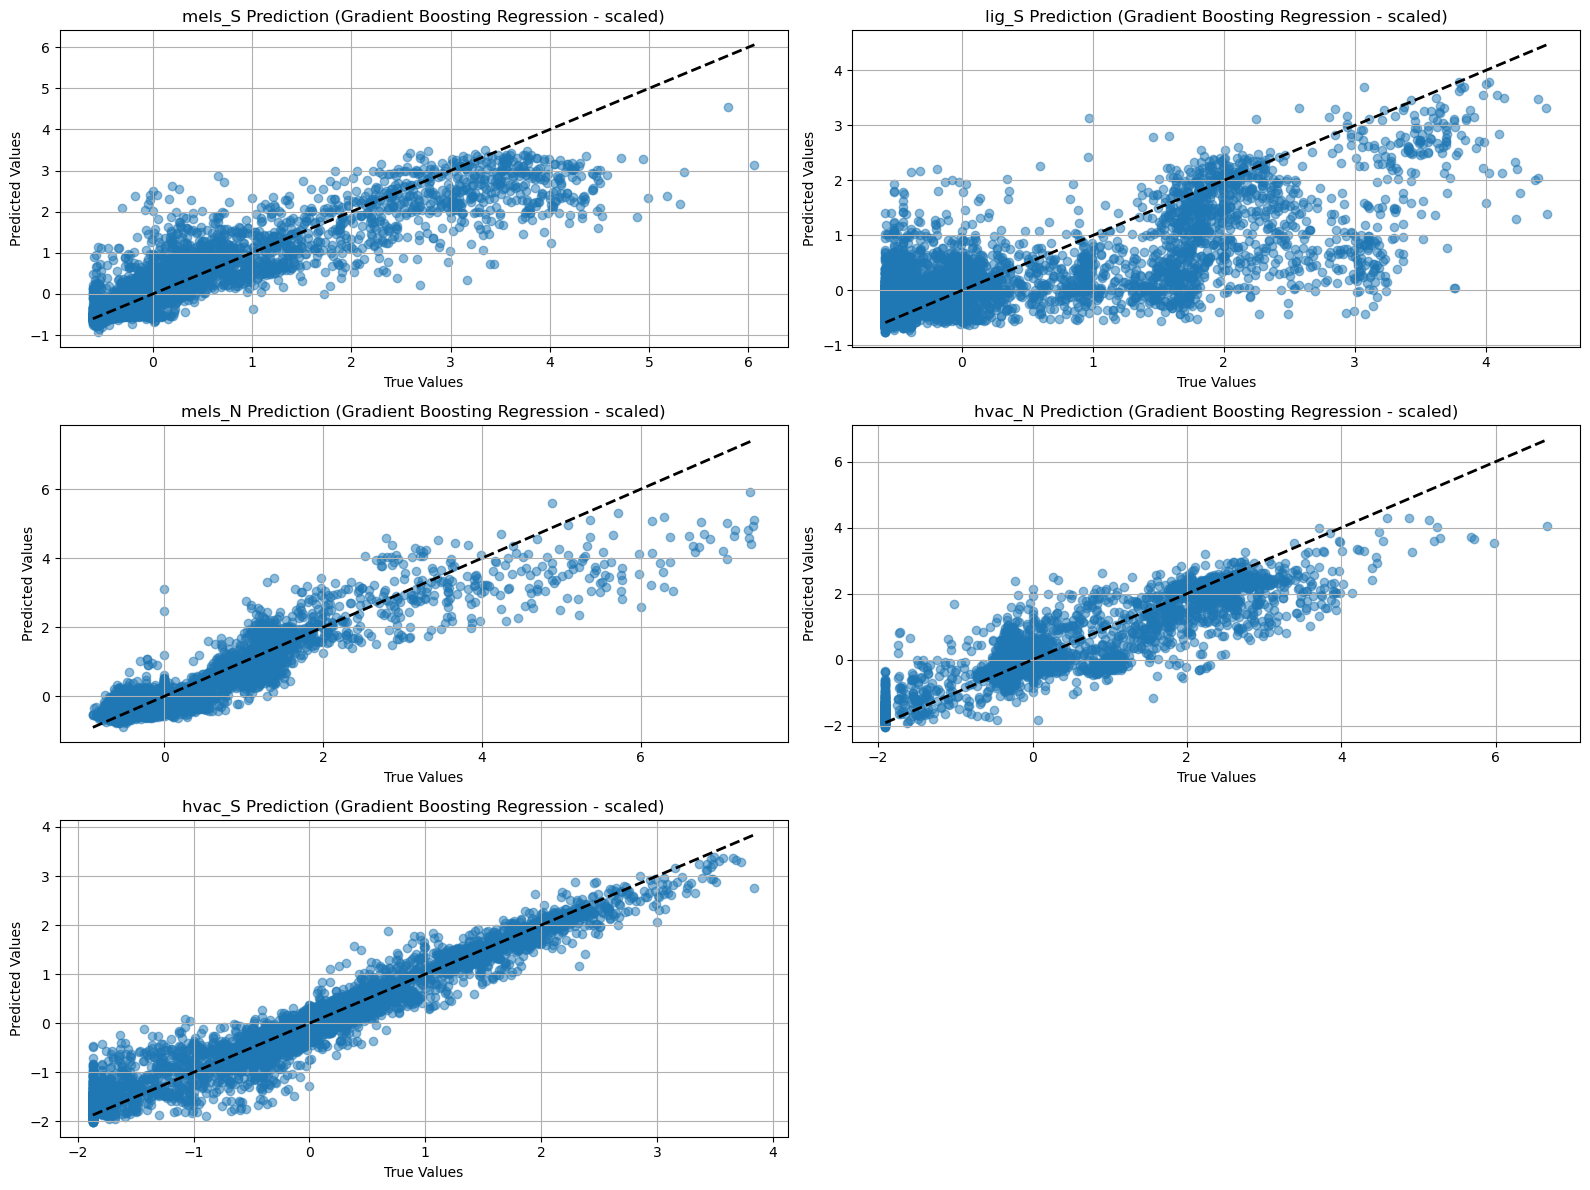

In [300]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR (scaled)
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction (Gradient Boosting Regression - scaled)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


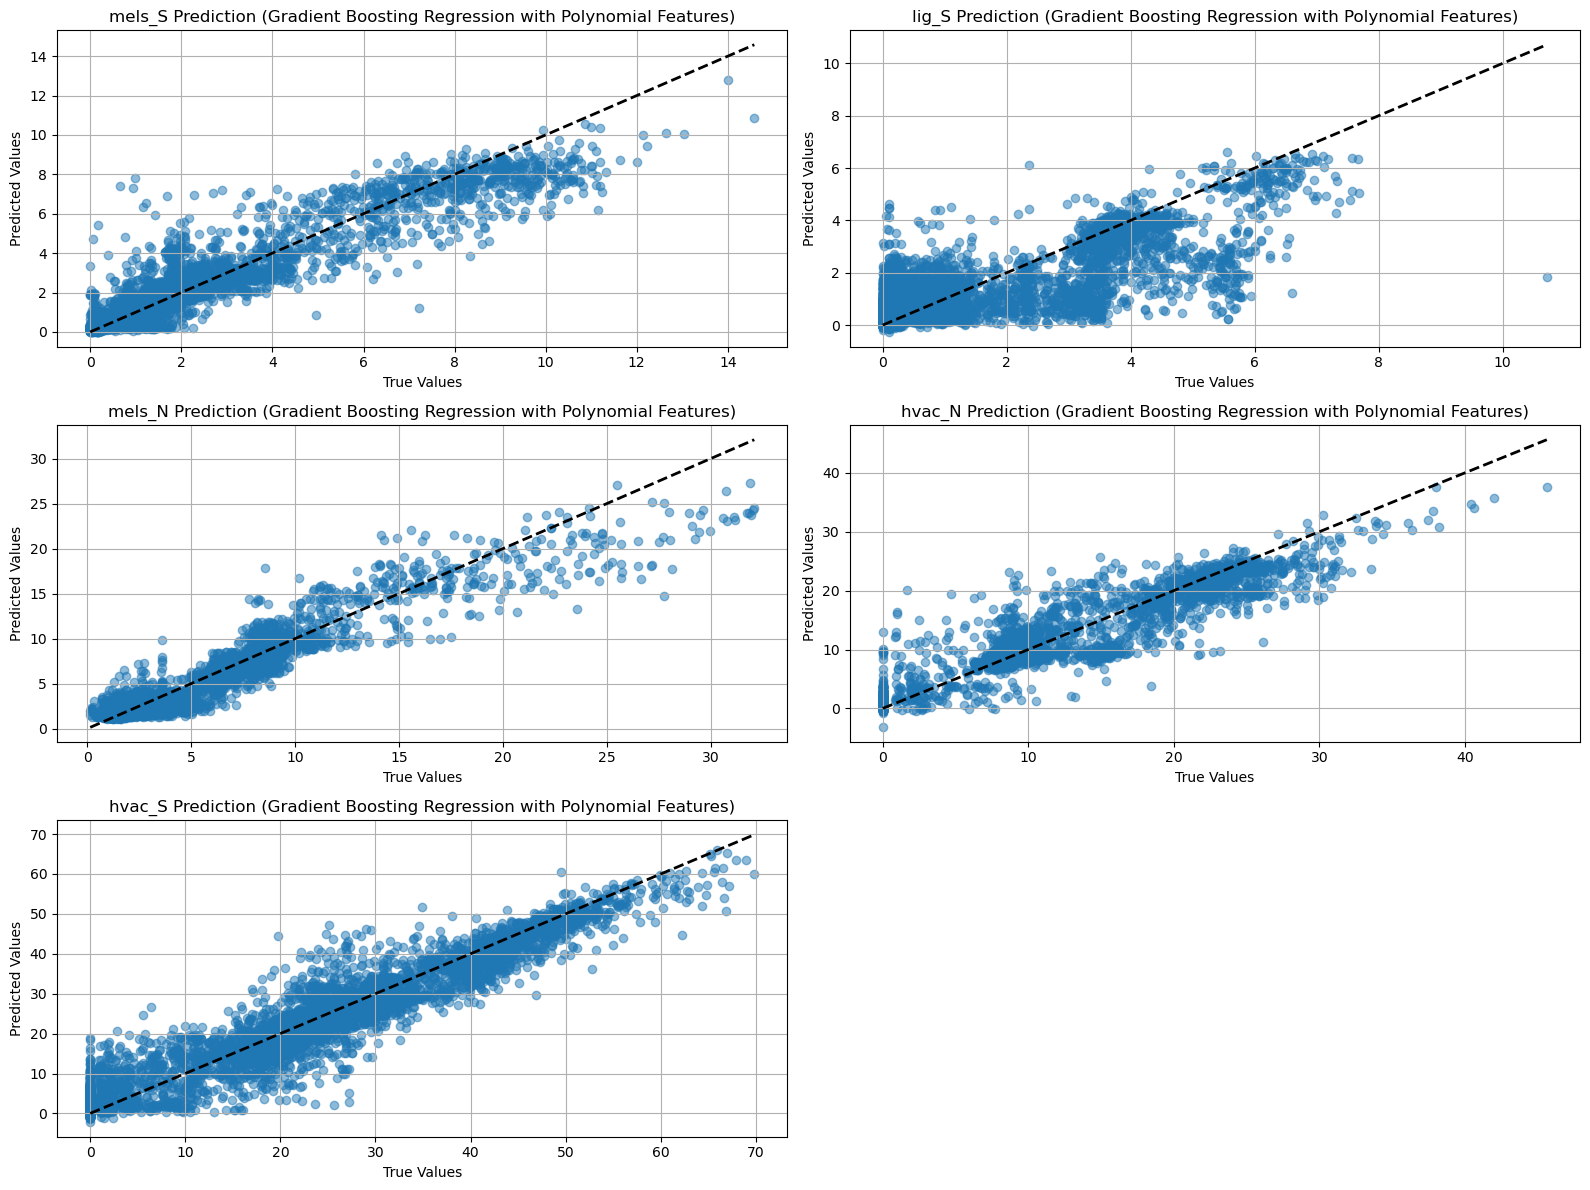

In [301]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR with polynomial features
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_preds_gb_poly[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (Gradient Boosting Regression with Polynomial Features)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

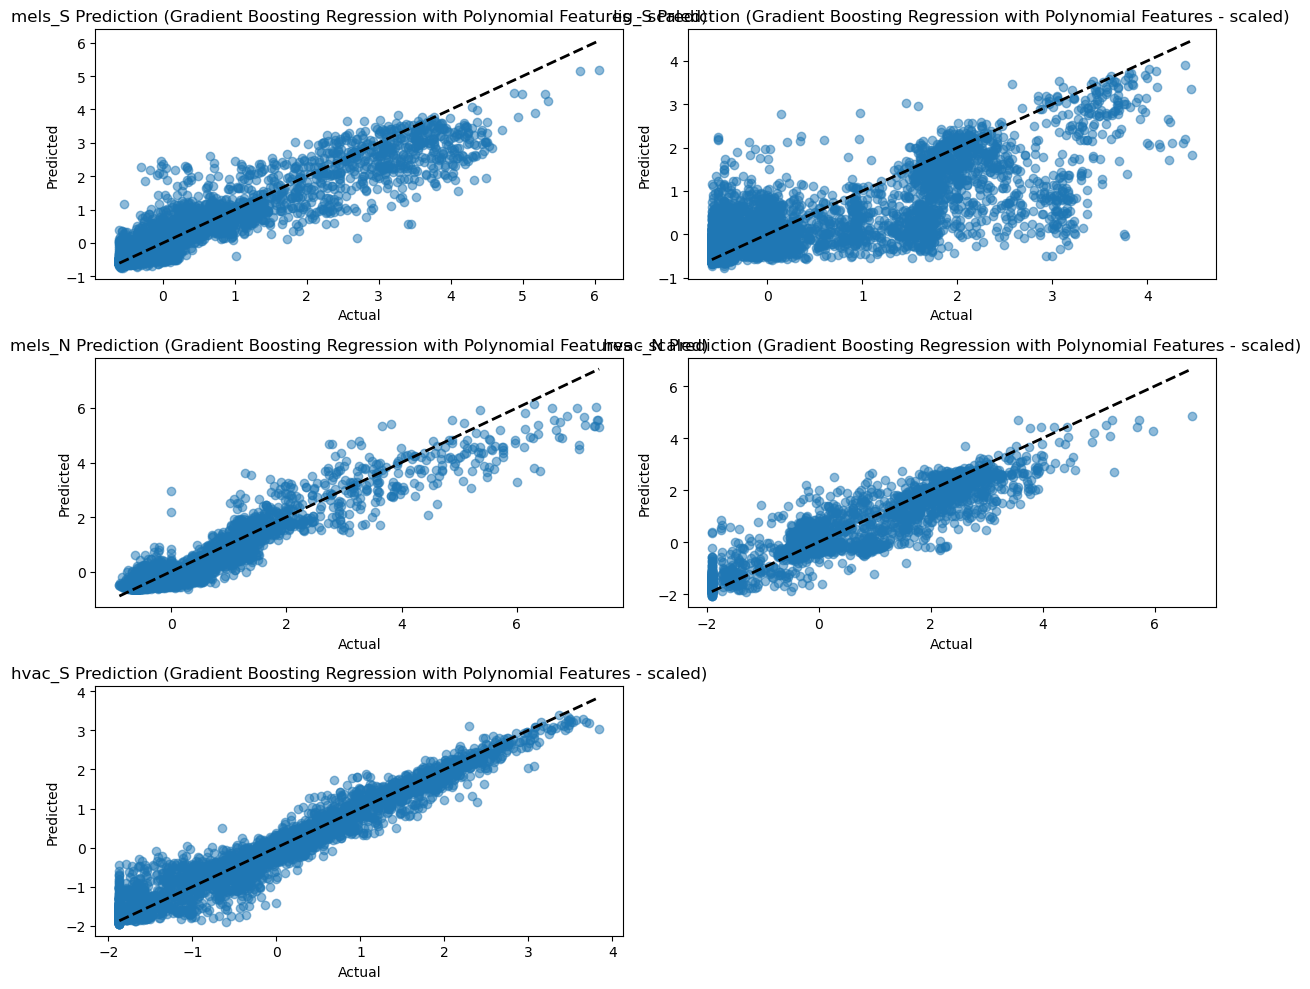

In [304]:
import matplotlib.pyplot as plt

# Plotting the graph for GBR with polynomial features (scaled)
plt.figure(figsize=(12, 10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{y_scaled.columns[i]} Prediction (Gradient Boosting Regression with Polynomial Features - scaled)')
plt.tight_layout()
plt.show()